# IPBES Classifier Results Analysis

This notebook provides a comprehensive analysis of machine learning model performance for the IPBES (Intergovernmental Panel on Biodiversity and Ecosystem Services) text classification task. The analysis compares different model architectures including traditional ML methods (SVM, Random Forest) and modern transformer-based models (BERT variants) across multiple evaluation metrics.

## Table of Contents
1. [SVM Analysis](#svm-analysis)
2. [Random Forest Analysis](#random-forest-analysis) 
3. [BERT Models Analysis](#bert-models-analysis)
4. [Comparative Analysis](#comparative-analysis)
5. [ROC Curves and Performance](#roc-curves-and-performance)
6. [Statistical Significance Testing](#statistical-significance-testing)
7. [Summary and Key Findings](#summary-and-key-findings)

---

## SVM Analysis {#svm-analysis}

### Data Format Information

**Test Prediction Files Format:**
- **Naming Convention**: 
  - With title: `fold_0_biobert-v1.1_BCE_with_title_run-0_opt_neg-500`
  - Without title: `fold_0_biobert-v1.1_BCE_run-0_opt_neg-500`
- **Columns**: `label`, `prediction`, `score`, `fold`, `title`
- **Structure**: One file contains results for one model on one fold

**Classification Categories:**
- **VA**: Values and Assumptions
- **SUA**: Sustainable Use of Assets  
- **IAS**: Invasive Alien Species

/home/leandre/Projects/Ipbes_Classifier
📊 Loading and analyzing SVM results...
✅ Loaded SVM data: 20 experiments
🔧 Kernels tested: linear, rbf, poly, sigmoid
📝 Title configurations: [False]

🎯 Analyzing performance by kernel type...


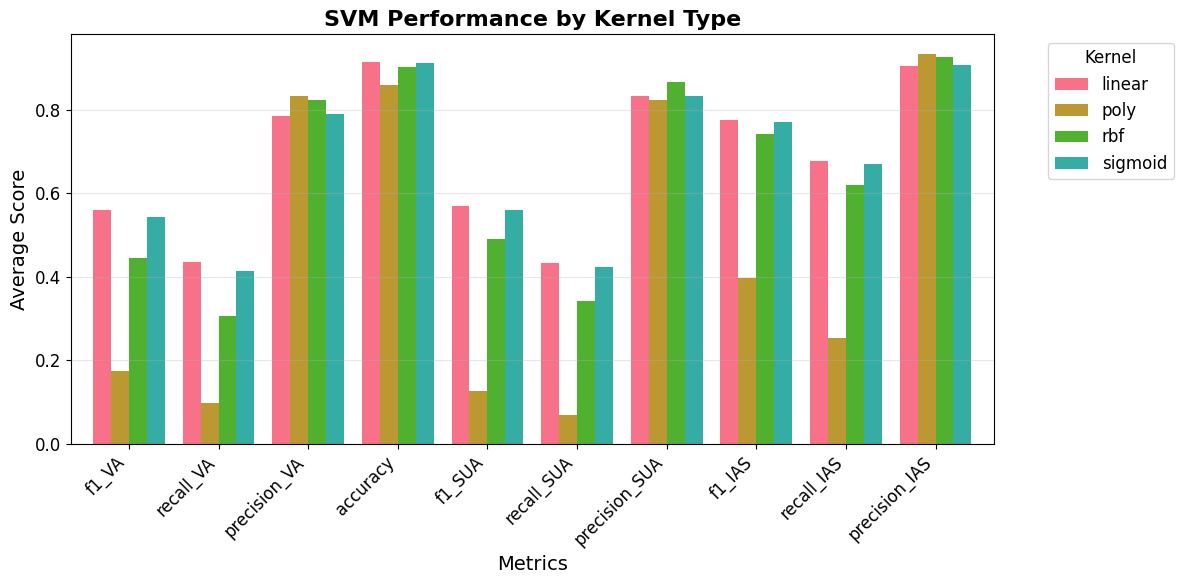

📈 Creating distribution plots by kernel...


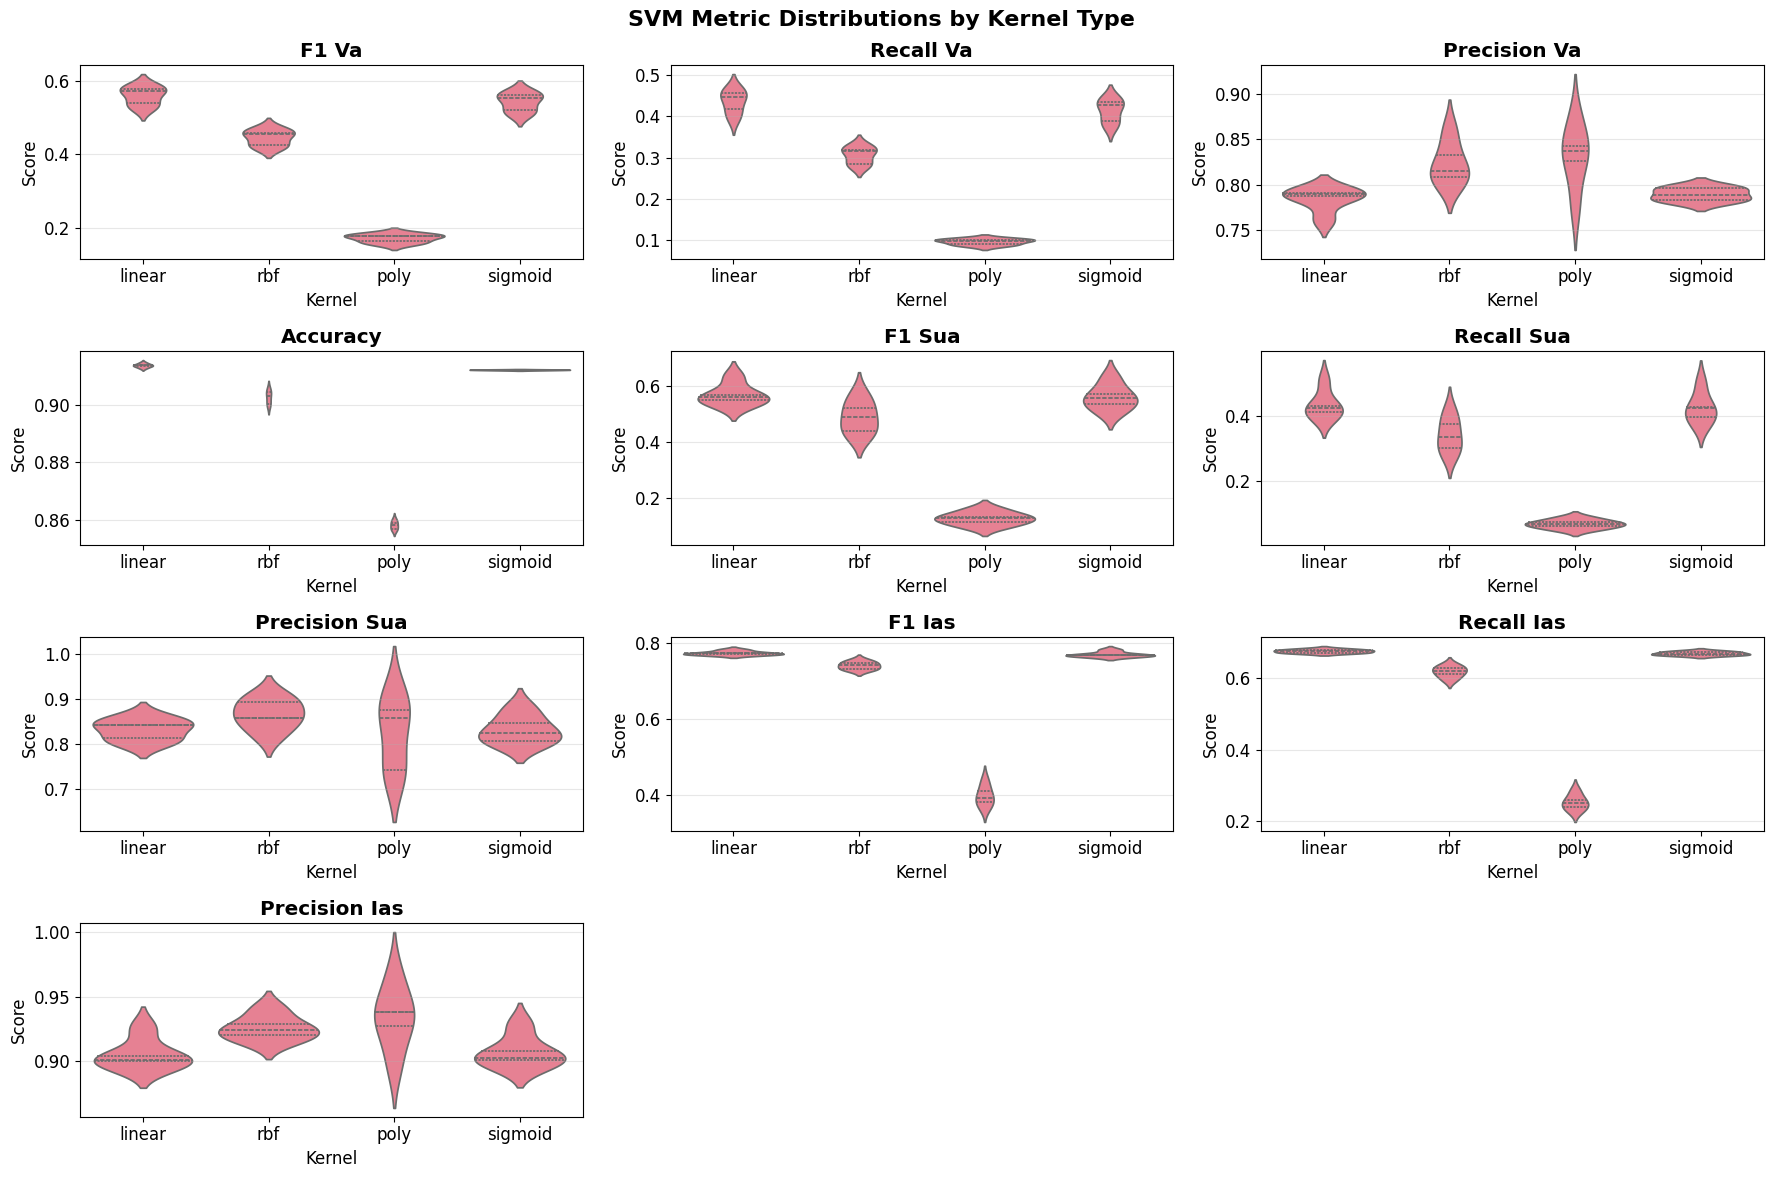

📄 Analyzing impact of title inclusion...


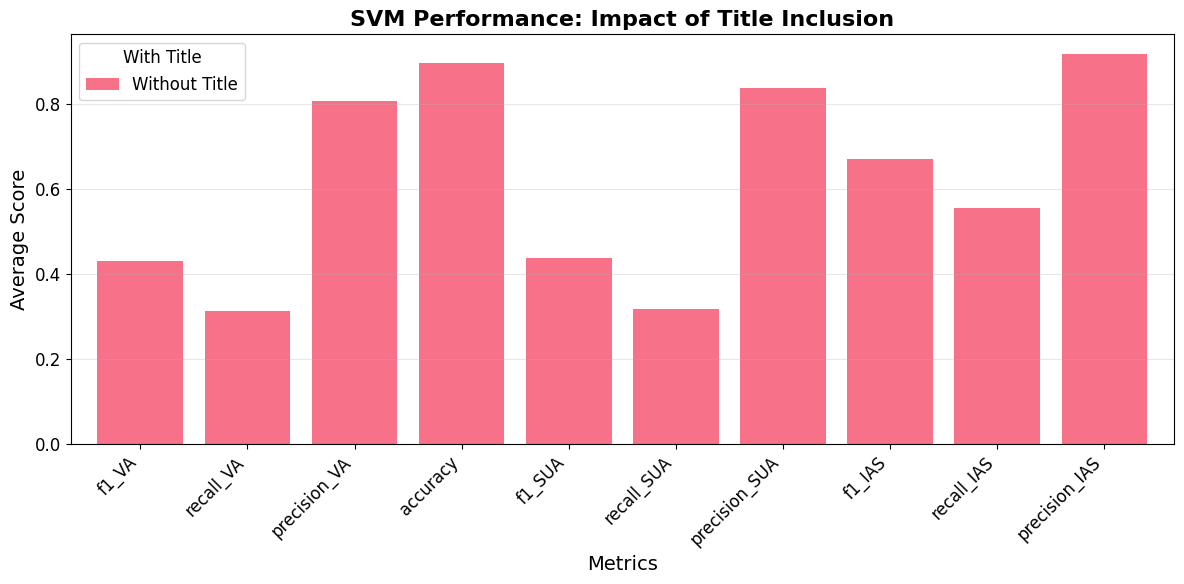


📊 SVM Performance Summary:
🏆 Best performing kernel: linear
📈 Average F1 scores by kernel:
   linear: 0.634
   rbf: 0.559
   poly: 0.232
   sigmoid: 0.625

📄 Title inclusion impact: Not enough data to compare


In [188]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
from pathlib import Path

# Set up project paths
project_root = Path(os.getcwd()).resolve().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print( project_root)
# Configure plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("📊 Loading and analyzing SVM results...")

# Load SVM results
svm_df = pd.read_csv(os.path.join(project_root, 'results/metrics/svm_metrics.csv'))
if 'model_name' in svm_df.columns:
    svm_df = svm_df.drop(columns=['model_name'])

print(f"✅ Loaded SVM data: {svm_df.shape[0]} experiments")
print(f"🔧 Kernels tested: {', '.join(svm_df['kernel'].unique())}")
print(f"📝 Title configurations: {svm_df['with_title'].unique()}")

# Define metrics for analysis
metrics = ['f1_VA', 'recall_VA', 'precision_VA', 'accuracy',
           'f1_SUA', 'recall_SUA', 'precision_SUA',
           'f1_IAS', 'recall_IAS', 'precision_IAS']

# 1. Performance by kernel type
print("\n🎯 Analyzing performance by kernel type...")
mean_by_kernel = svm_df.groupby('kernel')[metrics].mean()

fig, ax = plt.subplots(figsize=(12, 6))
mean_by_kernel.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('SVM Performance by Kernel Type', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=14)
ax.set_xlabel('Metrics', fontsize=14)
ax.legend(title='Kernel', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Distribution analysis by kernel
print("📈 Creating distribution plots by kernel...")
num_metrics = len(metrics)
n_cols = 3
n_rows = (num_metrics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.violinplot(data=svm_df, x='kernel', y=metric, ax=ax, inner='quart')
    ax.set_title(f'{metric.replace("_", " ").title()}', fontweight='bold')
    ax.set_ylabel('Score')
    ax.set_xlabel('Kernel')
    ax.grid(axis='y', alpha=0.3)

# Remove empty subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('SVM Metric Distributions by Kernel Type', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Impact of title inclusion
print("📄 Analyzing impact of title inclusion...")
mean_by_title = svm_df.groupby('with_title')[metrics].mean()

fig, ax = plt.subplots(figsize=(12, 6))
mean_by_title.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('SVM Performance: Impact of Title Inclusion', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=14)
ax.set_xlabel('Metrics', fontsize=14)
ax.legend(title='With Title', labels=['Without Title', 'With Title'])
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display summary statistics
print("\n📊 SVM Performance Summary:")
print("="*50)
best_kernel = mean_by_kernel.mean(axis=1).idxmax()
print(f"🏆 Best performing kernel: {best_kernel}")
print(f"📈 Average F1 scores by kernel:")
for kernel in svm_df['kernel'].unique():
    avg_f1 = svm_df[svm_df['kernel'] == kernel][['f1_VA', 'f1_SUA', 'f1_IAS']].mean().mean()
    print(f"   {kernel}: {avg_f1:.3f}")

title_impact = mean_by_title.mean(axis=1)
if len(title_impact) >= 2:
    impact_values = title_impact.values
    impact_diff = impact_values[1] - impact_values[0] if len(impact_values) > 1 else 0
    print(f"\n📄 Title inclusion impact: {'+' if impact_diff > 0 else ''}{impact_diff:.3f}")
else:
    print(f"\n📄 Title inclusion impact: Not enough data to compare")


---

## Random Forest Analysis {#random-forest-analysis}

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. This section analyzes the performance of Random Forest models with different hyperparameters.

🌲 Loading and analyzing Random Forest results...
✅ Loaded Random Forest data: 150 experiments
🌳 Number of trees tested: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
📊 Criteria tested: log_loss, gini, entropy
📝 Title configurations: [False]

🎯 Analyzing performance by number of trees...


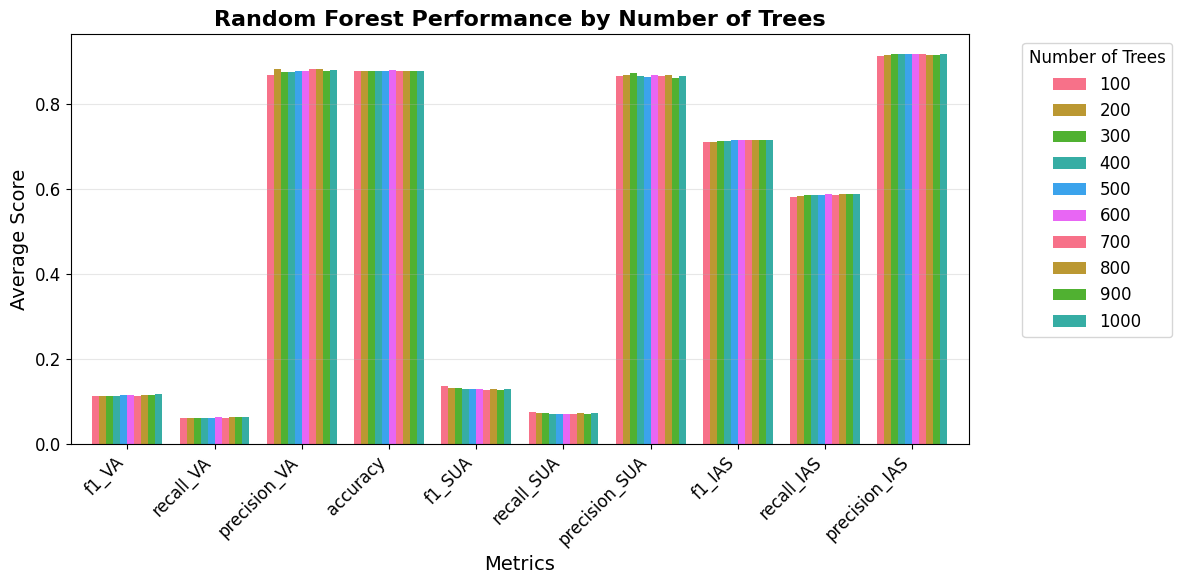

📏 Analyzing performance by splitting criterion...


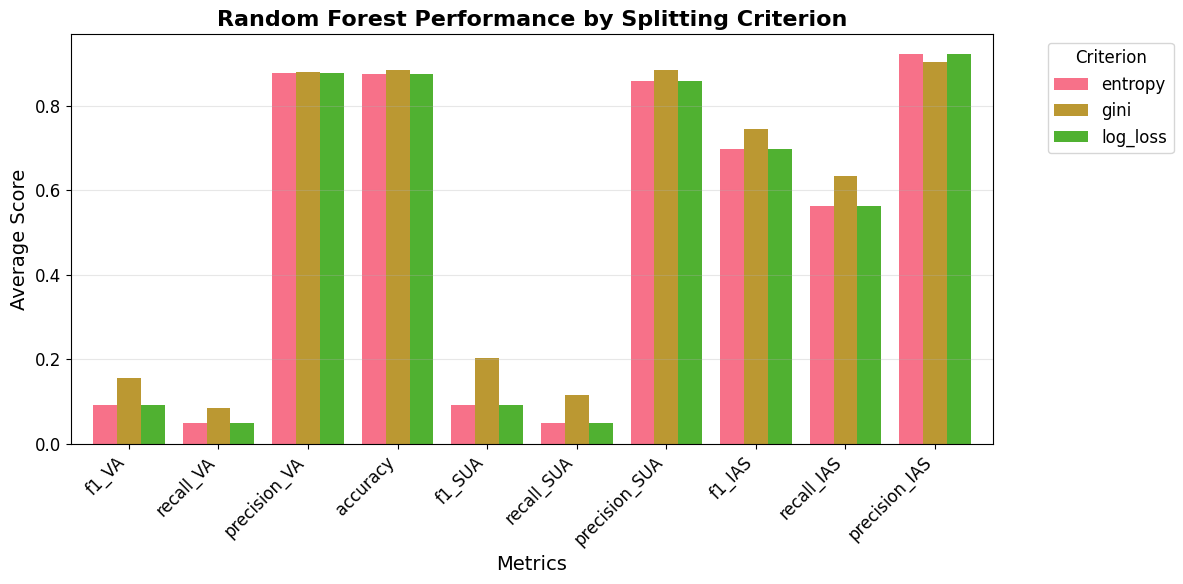

📄 Analyzing impact of title inclusion...


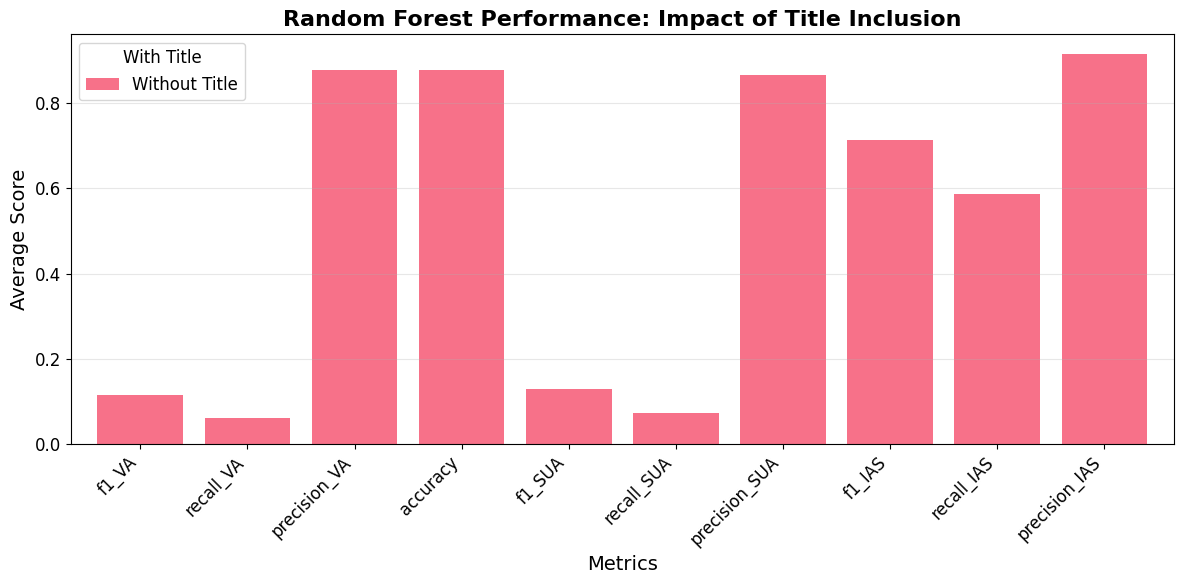

📈 Creating detailed distribution analysis...


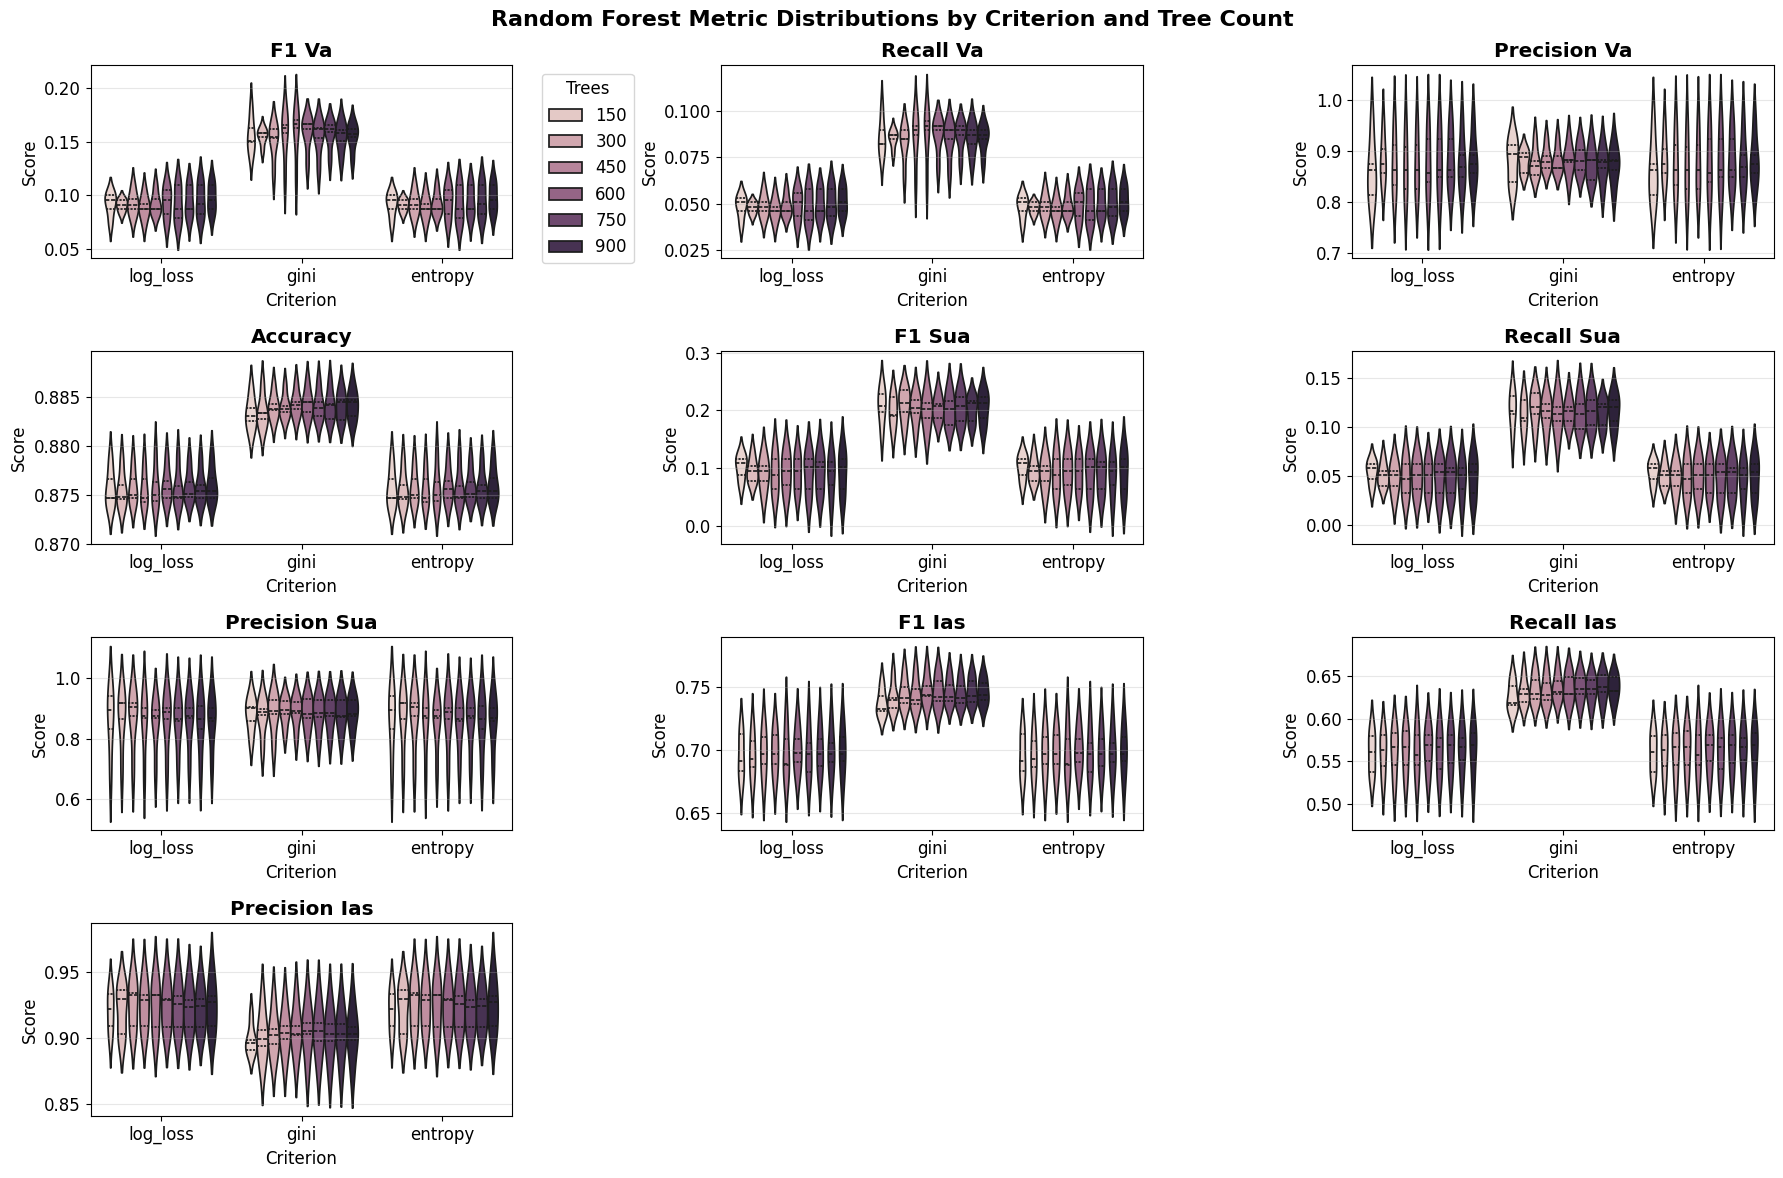


📊 Random Forest Performance Summary:
🏆 Best number of trees: 1000
🏆 Best criterion: gini

📈 Average F1 scores by tree count:
   100 trees: 0.320
   200 trees: 0.318
   300 trees: 0.319
   400 trees: 0.318
   500 trees: 0.319
   600 trees: 0.320
   700 trees: 0.318
   800 trees: 0.320
   900 trees: 0.319
   1000 trees: 0.321

📄 Title inclusion impact: Not enough data to compare


In [189]:
print("🌲 Loading and analyzing Random Forest results...")

# Load Random Forest results
rf_df = pd.read_csv(os.path.join(project_root, 'results/metrics/random_forest_metrics.csv'))
if 'model_name' in rf_df.columns:
    rf_df = rf_df.drop(columns=['model_name'])

print(f"✅ Loaded Random Forest data: {rf_df.shape[0]} experiments")
print(f"🌳 Number of trees tested: {sorted(rf_df['num_trees'].unique())}")
print(f"📊 Criteria tested: {', '.join(rf_df['criterion'].unique())}")
print(f"📝 Title configurations: {rf_df['with_title'].unique()}")

# 1. Performance by number of trees
print("\n🎯 Analyzing performance by number of trees...")
mean_by_trees = rf_df.groupby('num_trees')[metrics].mean()

fig, ax = plt.subplots(figsize=(12, 6))
mean_by_trees.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Random Forest Performance by Number of Trees', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=14)
ax.set_xlabel('Metrics', fontsize=14)
ax.legend(title='Number of Trees', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Performance by splitting criterion
print("📏 Analyzing performance by splitting criterion...")
mean_by_criterion = rf_df.groupby('criterion')[metrics].mean()

fig, ax = plt.subplots(figsize=(12, 6))
mean_by_criterion.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Random Forest Performance by Splitting Criterion', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=14)
ax.set_xlabel('Metrics', fontsize=14)
ax.legend(title='Criterion', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Impact of title inclusion
print("📄 Analyzing impact of title inclusion...")
mean_by_title = rf_df.groupby('with_title')[metrics].mean()

fig, ax = plt.subplots(figsize=(12, 6))
mean_by_title.T.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Random Forest Performance: Impact of Title Inclusion', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=14)
ax.set_xlabel('Metrics', fontsize=14)
ax.legend(title='With Title', labels=['Without Title', 'With Title'])
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Detailed distribution analysis
print("📈 Creating detailed distribution analysis...")
num_metrics = len(metrics)
n_cols = 3
n_rows = (num_metrics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.violinplot(data=rf_df, x='criterion', y=metric, hue='num_trees', ax=ax, inner='quart')
    ax.set_title(f'{metric.replace("_", " ").title()}', fontweight='bold')
    ax.set_ylabel('Score')
    ax.set_xlabel('Criterion')
    ax.grid(axis='y', alpha=0.3)
    if i == 0:  # Only show legend for first plot
        ax.legend(title='Trees', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

# Remove empty subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Random Forest Metric Distributions by Criterion and Tree Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Display summary statistics
print("\n📊 Random Forest Performance Summary:")
print("="*50)
best_trees = mean_by_trees.mean(axis=1).idxmax()
best_criterion = mean_by_criterion.mean(axis=1).idxmax()
print(f"🏆 Best number of trees: {best_trees}")
print(f"🏆 Best criterion: {best_criterion}")

print(f"\n📈 Average F1 scores by tree count:")
for trees in sorted(rf_df['num_trees'].unique()):
    avg_f1 = rf_df[rf_df['num_trees'] == trees][['f1_VA', 'f1_SUA', 'f1_IAS']].mean().mean()
    print(f"   {trees} trees: {avg_f1:.3f}")

title_impact = mean_by_title.mean(axis=1)
if len(title_impact) >= 2:
    impact_values = title_impact.values
    impact_diff = impact_values[1] - impact_values[0] if len(impact_values) > 1 else 0
    print(f"\n📄 Title inclusion impact: {'+' if impact_diff > 0 else ''}{impact_diff:.3f}")
else:
    print(f"\n📄 Title inclusion impact: Not enough data to compare")

---

## BERT Models Analysis {#bert-models-analysis}

This section analyzes the performance of BERT-based transformer models including:
- **BERT**: Bidirectional Encoder Representations from Transformers
- **BioBERT**: BERT pre-trained on biomedical texts
- **BiomedBERT**: BERT variants specifically designed for biomedical applications
- **RoBERTa**: Robustly Optimized BERT Pretraining Approach

The analysis compares different loss functions (Binary Cross-Entropy vs Focal Loss) and input configurations (with/without titles).

In [190]:
print("🤖 Loading and analyzing BERT model results...")

# Load BERT results
bert_df = pd.read_csv(os.path.join(project_root, 'results/metrics/results.csv'))
bert_df_title = bert_df[bert_df['with_title'] == True]
bert_df_abs = bert_df[bert_df['with_title'] == False]

print(f"✅ Loaded BERT data: {bert_df.shape[0]} total experiments")
print(f"📝 With title: {bert_df_title.shape[0]} experiments")
print(f"📄 Abstract only: {bert_df_abs.shape[0]} experiments")
print(f"🏷️ Models tested: {len(bert_df['model_name'].unique())}")
print(f"🔄 Loss types: {', '.join(bert_df['loss_type'].unique())}")

# Define comprehensive metric columns
metric_cols = ['f1_VA', 'recall_VA', 'precision_VA', 'roc_auc_VA', 'AP_VA',
               'f1_SUA', 'recall_SUA', 'precision_SUA', 'roc_auc_SUA', 'AP_SUA',
               'f1_IAS', 'recall_IAS', 'precision_IAS', 'roc_auc_IAS', 'AP_IAS', 
               'f1_weighted', 'recall_weighted', 'precision_weighted', 'roc_auc_weighted', 'AP_weighted']

# Filter by loss type for detailed analysis
df_bce = bert_df_title[bert_df_title['loss_type'] == 'BCE']
df_focal = bert_df_title[bert_df_title['loss_type'] == 'focal']

print(f"\n🎯 BCE models: {len(df_bce['model_name'].unique())} unique models")
print(f"🎯 Focal Loss models: {len(df_focal['model_name'].unique())} unique models")

# Aggregate metrics by model and loss type
agg_bce = df_bce.groupby('model_name')[metric_cols].mean().reset_index() if not df_bce.empty else pd.DataFrame()
agg_focal = df_focal.groupby('model_name')[metric_cols].mean().reset_index() if not df_focal.empty else pd.DataFrame()

def plot_bert_performance_comparison():
    """Create comprehensive BERT model performance comparison"""
    
    # 1. Overall performance comparison by loss type
    print("📊 Creating loss type comparison...")
    
    if not agg_bce.empty and not agg_focal.empty:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # BCE models
        f1_metrics = ['f1_VA', 'f1_SUA', 'f1_IAS', 'f1_weighted']
        bce_f1 = agg_bce[['model_name'] + f1_metrics].set_index('model_name')
        bce_f1.plot(kind='bar', ax=ax1, width=0.8)
        ax1.set_title('BCE Models - F1 Score Comparison', fontsize=14, fontweight='bold')
        ax1.set_ylabel('F1 Score')
        ax1.set_xlabel('Model')
        ax1.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(axis='y', alpha=0.3)
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        # Focal Loss models  
        focal_f1 = agg_focal[['model_name'] + f1_metrics].set_index('model_name')
        focal_f1.plot(kind='bar', ax=ax2, width=0.8)
        ax2.set_title('Focal Loss Models - F1 Score Comparison', fontsize=14, fontweight='bold')
        ax2.set_ylabel('F1 Score')
        ax2.set_xlabel('Model')
        ax2.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(axis='y', alpha=0.3)
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
    
    # 2. ROC-AUC comparison
    print("📈 Creating ROC-AUC comparison...")
    
    if not agg_bce.empty and not agg_focal.empty:
        roc_metrics = ['roc_auc_VA', 'roc_auc_SUA', 'roc_auc_IAS', 'roc_auc_weighted']
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # BCE ROC-AUC
        bce_roc = agg_bce[['model_name'] + roc_metrics].set_index('model_name')
        bce_roc.plot(kind='bar', ax=ax1, width=0.8)
        ax1.set_title('BCE Models - ROC-AUC Comparison', fontsize=14, fontweight='bold')
        ax1.set_ylabel('ROC-AUC Score')
        ax1.set_xlabel('Model')
        ax1.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(axis='y', alpha=0.3)
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        # Focal ROC-AUC
        focal_roc = agg_focal[['model_name'] + roc_metrics].set_index('model_name')
        focal_roc.plot(kind='bar', ax=ax2, width=0.8)
        ax2.set_title('Focal Loss Models - ROC-AUC Comparison', fontsize=14, fontweight='bold')
        ax2.set_ylabel('ROC-AUC Score')
        ax2.set_xlabel('Model')
        ax2.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(axis='y', alpha=0.3)
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()

# Execute the plotting function
plot_bert_performance_comparison()




🤖 Loading and analyzing BERT model results...
✅ Loaded BERT data: 30 total experiments
📝 With title: 30 experiments
📄 Abstract only: 0 experiments
🏷️ Models tested: 6
🔄 Loss types: BCE

🎯 BCE models: 6 unique models
🎯 Focal Loss models: 0 unique models
📊 Creating loss type comparison...
📈 Creating ROC-AUC comparison...


---

## Comparative Analysis {#comparative-analysis}

This section provides a comprehensive comparison across all model types (SVM, Random Forest, BERT variants) to identify the best performing approaches and understand the impact of different configurations.

🔄 Preparing data for comparative analysis...
🔗 Combining all model results...
✅ Combined dataset: 200 total experiments
📊 Model categories: BERT, SVM, Random Forest
🎯 Loss types: BCE, Traditional ML

📈 Creating model category performance comparison...


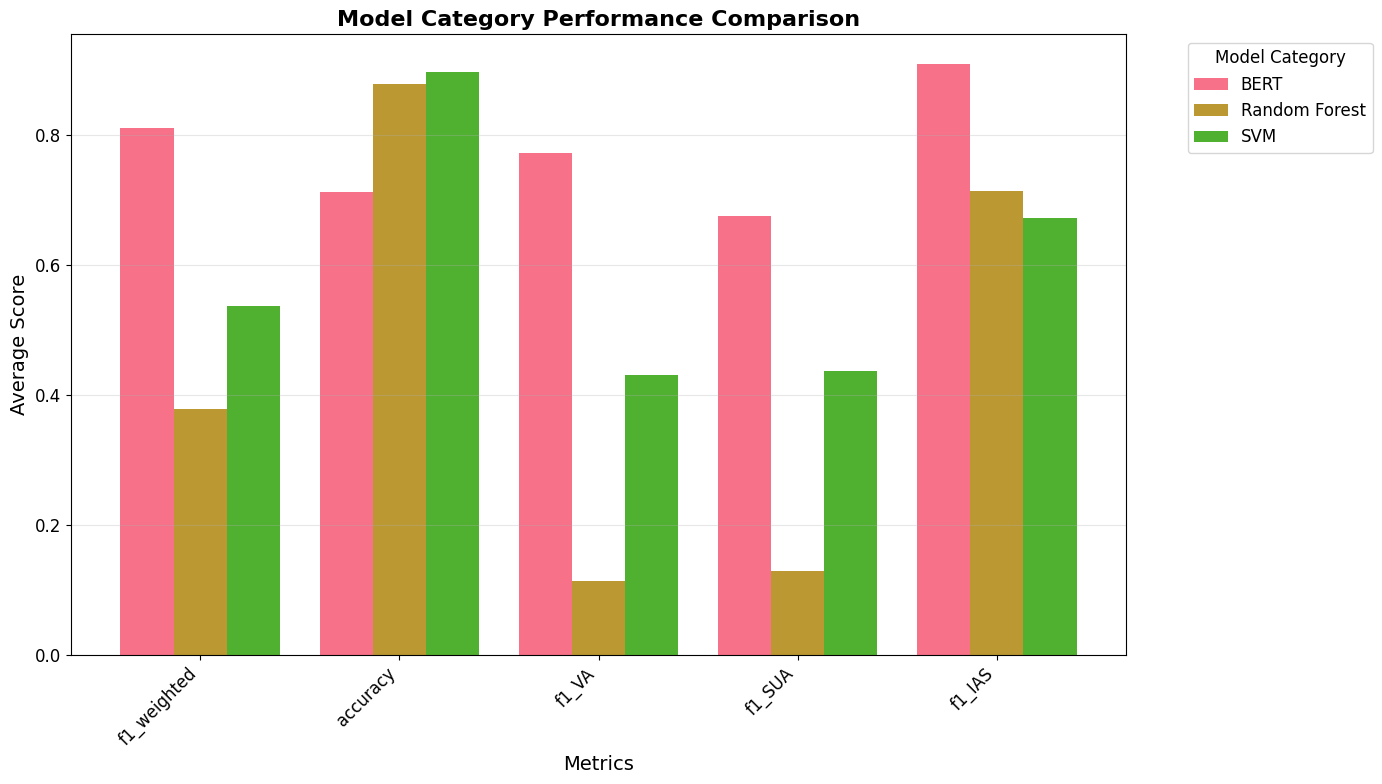


📊 Model Category Performance Summary:
BERT            | F1-Weighted: 0.810 | Accuracy: 0.712
Random Forest   | F1-Weighted: 0.379 | Accuracy: 0.879
SVM             | F1-Weighted: 0.537 | Accuracy: 0.897


In [191]:
print("🔄 Preparing data for comparative analysis...")

# Standardize model categories for comparison
bert_df_title['model_category'] = 'BERT'
svm_df['model_category'] = 'SVM' 
rf_df['model_category'] = 'Random Forest'

# Standardize loss_type column
bert_df_title['loss_type'] = bert_df_title['loss_type'].astype(str)
svm_df['loss_type'] = 'Traditional ML'
rf_df['loss_type'] = 'Traditional ML'

# Ensure consistent model_name column
if 'model_name' not in svm_df.columns:
    svm_df['model_name'] = 'SVM'
if 'model_name' not in rf_df.columns:
    rf_df['model_name'] = 'Random Forest'

# Create unified dataset for comparison
print("🔗 Combining all model results...")
all_runs = pd.concat([bert_df_title, svm_df, rf_df], ignore_index=True)

print(f"✅ Combined dataset: {all_runs.shape[0]} total experiments")
print(f"📊 Model categories: {', '.join(all_runs['model_category'].unique())}")
print(f"🎯 Loss types: {', '.join(all_runs['loss_type'].unique())}")

# Create high-level performance comparison
def create_model_comparison_summary():
    """Create summary comparison across all model types"""
    
    print("\n📈 Creating model category performance comparison...")
    
    # Key metrics for comparison
    key_metrics = ['f1_weighted', 'accuracy', 'f1_VA', 'f1_SUA', 'f1_IAS']
    
    # Calculate mean performance by model category
    category_performance = all_runs.groupby('model_category')[key_metrics].mean()
    
    # Create comparison plot
    fig, ax = plt.subplots(figsize=(14, 8))
    category_performance.T.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title('Model Category Performance Comparison', fontsize=16, fontweight='bold')
    ax.set_ylabel('Average Score', fontsize=14)
    ax.set_xlabel('Metrics', fontsize=14)
    ax.legend(title='Model Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Display summary statistics
    print("\n📊 Model Category Performance Summary:")
    print("="*60)
    for category in category_performance.index:
        avg_f1 = category_performance.loc[category, 'f1_weighted']
        avg_acc = category_performance.loc[category, 'accuracy']
        print(f"{category:15} | F1-Weighted: {avg_f1:.3f} | Accuracy: {avg_acc:.3f}")
    
    return category_performance

# Execute comparison
category_perf = create_model_comparison_summary()


In [192]:
from ipywidgets import interact, Dropdown, RadioButtons
import warnings
warnings.filterwarnings('ignore')

print("🎛️ Setting up interactive analysis widgets...")

# Prepare baseline models for comparison
baselines = pd.concat([svm_df, rf_df], ignore_index=True)
baselines['loss_type'] = 'Baseline'

# Get available folds
folds = sorted(all_runs['fold'].unique()) if 'fold' in all_runs.columns else [0]
print(f"📊 Available folds: {folds}")

# Enhanced interactive plotting function
@interact(
    metric=Dropdown(
        options=[m for m in metric_cols if m in all_runs.columns], 
        description="📊 Metric:",
        value='f1_weighted'
    ),
    data_config=Dropdown(
        options=['with_title', 'without_title', 'all_models'], 
        description="📝 Data Config:",
        value='with_title'
    ),
    view_type=RadioButtons(
        options=['Distribution', 'By_Fold', 'Comparison'], 
        description="👁️ View Type:",
        value='Distribution'
    )
)
def interactive_performance_analysis(metric, data_config, view_type):
    """Interactive analysis of model performance across different configurations"""
    
    # Select appropriate data based on configuration
    if data_config == 'with_title':
        data = bert_df_title.copy()
        title_suffix = "With Title"
    elif data_config == 'without_title':
        data = bert_df_abs.copy()  
        title_suffix = "Abstract Only"
    else:  # all_models
        data = all_runs.copy()
        title_suffix = "All Models"
    
    # Filter out invalid data
    data = data.dropna(subset=[metric])
    
    if data.empty:
        print(f"❌ No data available for metric: {metric}")
        return
    
    print(f"📈 Analyzing {metric} for {title_suffix}")
    print(f"📊 Data points: {len(data)}")
    
    # Set up plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    if view_type == 'Distribution':
        # Violin plot showing distribution across models
        plt.figure(figsize=(15, 8))
        
        if 'loss_type' in data.columns and len(data['loss_type'].unique()) > 1:
            sns.violinplot(data=data, x='model_name', y=metric, hue='loss_type', inner='quart')
            plt.legend(title='Loss Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            sns.violinplot(data=data, x='model_name', y=metric, inner='quart')
        
        plt.title(f'{metric.replace("_", " ").title()} Distribution - {title_suffix}', 
                 fontsize=16, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(metric.replace('_', ' ').title())
        plt.xlabel('Model')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Display summary stats
        summary_stats = data.groupby('model_name')[metric].agg(['mean', 'std', 'count']).round(3)
        print(f"\n📊 {metric} Summary Statistics:")
        print(summary_stats.to_string())
    
    elif view_type == 'By_Fold':
        # Performance by fold
        if 'fold' not in data.columns:
            print("❌ Fold information not available for this dataset")
            return
            
        available_folds = sorted(data['fold'].unique())
        n_folds = len(available_folds)
        
        if n_folds == 0:
            print("❌ No fold data available")
            return
            
        ncols = min(3, n_folds)
        nrows = (n_folds + ncols - 1) // ncols
        
        fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
        if n_folds == 1:
            axes = [axes]
        else:
            axes = axes.flatten() if nrows > 1 else axes
        
        for i, fold in enumerate(available_folds):
            ax = axes[i] if n_folds > 1 else axes[0]
            fold_data = data[data['fold'] == fold]
            
            if 'loss_type' in fold_data.columns and len(fold_data['loss_type'].unique()) > 1:
                sns.barplot(data=fold_data, x='model_name', y=metric, hue='loss_type', ax=ax)
            else:
                sns.barplot(data=fold_data, x='model_name', y=metric, ax=ax)
                
            ax.set_title(f'Fold {fold}', fontweight='bold')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.grid(axis='y', alpha=0.3)
            
            if i == 0:
                ax.set_ylabel(metric.replace('_', ' ').title())
            else:
                ax.set_ylabel('')
        
        # Remove empty subplots
        for j in range(n_folds, len(axes)):
            fig.delaxes(axes[j])
            
        plt.suptitle(f'{metric.replace("_", " ").title()} by Fold - {title_suffix}', 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    elif view_type == 'Comparison':
        # Side-by-side comparison of top models
        top_models = data.groupby('model_name')[metric].mean().nlargest(5).index
        comparison_data = data[data['model_name'].isin(top_models)]
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=comparison_data, x='model_name', y=metric)
        plt.title(f'Top 5 Models - {metric.replace("_", " ").title()} Comparison', 
                 fontsize=16, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(metric.replace('_', ' ').title())
        plt.xlabel('Model')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Show ranking
        ranking = data.groupby('model_name')[metric].mean().sort_values(ascending=False)
        print(f"\n🏆 Model Ranking by {metric}:")
        for i, (model, score) in enumerate(ranking.head(10).items(), 1):
            print(f"{i:2d}. {model:30} | {score:.4f}")

print("✅ Interactive widgets ready! Use the controls above to explore the data.")

🎛️ Setting up interactive analysis widgets...
📊 Available folds: [1, 2, 3, 4, 5]


interactive(children=(Dropdown(description='📊 Metric:', index=15, options=('f1_VA', 'recall_VA', 'precision_VA…

✅ Interactive widgets ready! Use the controls above to explore the data.


---

## ROC Curves and Performance Analysis {#roc-curves-and-performance}

This section analyzes model performance using ROC (Receiver Operating Characteristic) curves and precision-recall curves, which provide insights into the trade-offs between true positive rate and false positive rate across different classification thresholds.

📊 Setting up ROC curve analysis...
✅ Found prediction directory: /home/leandre/Projects/Ipbes_Classifier/results/test preds
🏆 Best SVM parameters:
kernel  with_title
linear       False
📁 Found 30 bert prediction files
✅ Loaded data for 6 model configurations
model_data keys: ['BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext_BCE_with_title_run-0_opt_neg-100', 'bert-base-uncased_BCE_with_title_run-0_opt_neg-100', 'BiomedNLP-BiomedBERT-base-uncased-abstract_BCE_with_title_run-0_opt_neg-100', 'roberta-base_BCE_with_title_run-0_opt_neg-100', 'biobert-v1.1_BCE_with_title_run-0_opt_neg-100', 'Ensemble_BCE_with_title_run-0_opt_neg-100']

📈 ROC-AUC Performance Analysis from Metrics


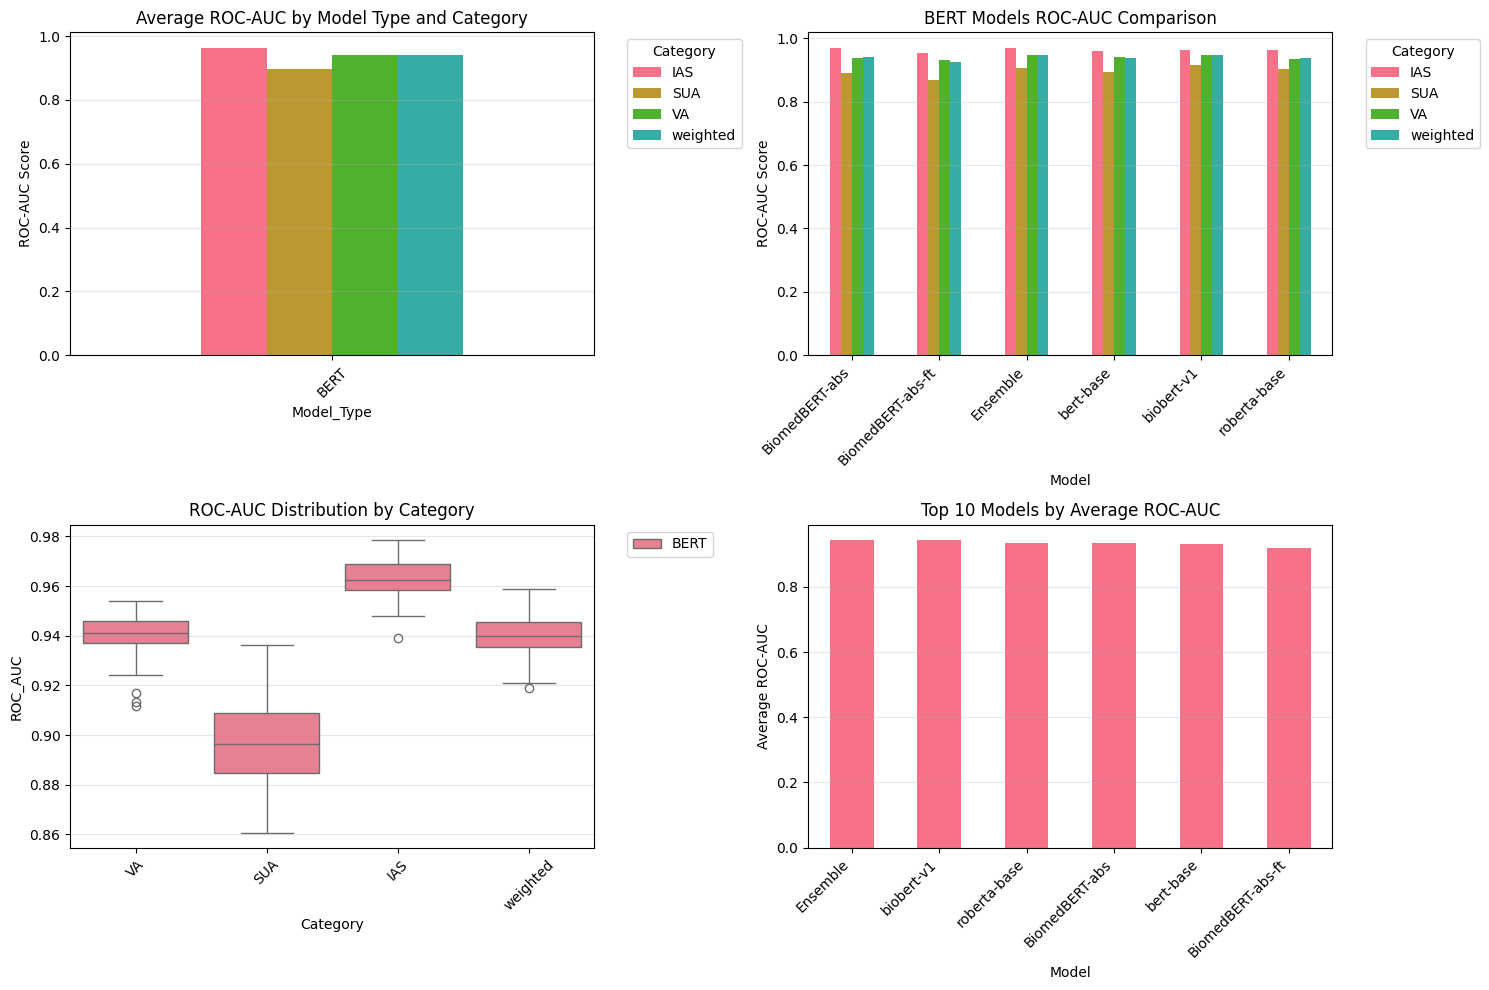


🏆 ROC-AUC Performance Summary:
           mean    std    max
Category                     
IAS       0.963  0.009  0.979
SUA       0.897  0.020  0.936
VA        0.940  0.011  0.954
weighted  0.939  0.010  0.959

🥇 Top 5 Models by Average ROC-AUC:
   Ensemble (BERT): 0.9434
   biobert-v1 (BERT): 0.9432
   roberta-base (BERT): 0.9353
   BiomedBERT-abs (BERT): 0.9347
   bert-base (BERT): 0.9329

🎛️ Interactive ROC Curve Analysis Available


interactive(children=(Dropdown(description='📊 Model:', options=('BiomedNLP-BiomedBERT-base-uncased-abstract-fu…

In [193]:
print("📊 Setting up ROC curve analysis...")

# Check if we have access to prediction files
try:
    import glob
    from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
    from sklearn.preprocessing import label_binarize
    
    # Try to find prediction files in common locations
    possible_dirs = [
        os.path.join(project_root, 'results', 'test_preds'),
        os.path.join(project_root, 'results', 'predictions'),
        '/home/leandre/Projects/Ipbes_Classifier/results/test preds'
    ]
    
    DATA_DIR = None
    for dir_path in possible_dirs:
        if os.path.exists(dir_path):
            DATA_DIR = dir_path
            break
    
    if DATA_DIR is None:
        print("⚠️ Prediction files not found. Using aggregated metrics only.")
        has_prediction_files = False
    else:
        print(f"✅ Found prediction directory: {DATA_DIR}")
        has_prediction_files = True
        
        # Find best SVM configuration for comparison
        if not svm_df.empty:
            best_svm = svm_df.groupby(['kernel', 'with_title'])["f1_weighted"].mean().reset_index()
            best_svm = best_svm.sort_values(by='f1_weighted', ascending=False).head(1)
            print('🏆 Best SVM parameters:')
            print(best_svm[['kernel', 'with_title']].to_string(index=False))
        
        # Load prediction files if available
        model_data = {}
        
        for model_type in ["bert", "svm", "rf"]:
            type_dir = os.path.join(DATA_DIR, model_type)
            if not os.path.exists(type_dir):
                continue
                
            all_files = glob.glob(os.path.join(type_dir, '*.csv'))
            print(f"📁 Found {len(all_files)} {model_type} prediction files")
            
            for fpath in all_files:
                try:
                    df = pd.read_csv(fpath)
                    fname = os.path.basename(fpath).replace('.csv', '')
                    
                    
                    if model_type == "bert":
                        if fname.startswith('fold_'):
                            model_name = fname[7:]
                        else:
                            model_name = fname
                    else:
                        model_name = f"{model_type}_{fname}"
                    
                    # Store data by model
                    if model_name not in model_data:
                        model_data[model_name] = []
                    
                    # Extract fold information
                    if 'fold' in df.columns:
                        fold_data = df
                        model_data[model_name].append(fold_data)
                    else:
                        print(f"⚠️ No fold info in {fpath}, skipping")
                    
                except Exception as e:
                    print(f"⚠️ Error loading {fpath}: {e}")
                    continue
        
        print(f"✅ Loaded data for {len(model_data)} model configurations")
        print("model_data keys:", list(model_data.keys()))

except ImportError as e:
    print(f"⚠️ Missing dependencies for ROC analysis: {e}")
    has_prediction_files = False

# Alternative analysis using aggregated metrics
def analyze_roc_performance_from_metrics():
    """Analyze ROC performance using pre-computed metrics"""
    print("\n📈 ROC-AUC Performance Analysis from Metrics")
    print("="*50)
    
    # Combine all model results for ROC-AUC comparison
    roc_metrics = ['roc_auc_VA', 'roc_auc_SUA', 'roc_auc_IAS', 'roc_auc_weighted']
    
    # Create comparison dataframe
    comparison_data = []
    
    # Add BERT results
    if not bert_df_title.empty:
        for _, row in bert_df_title.iterrows():
            for metric in roc_metrics:
                if metric in row and pd.notna(row[metric]):
                    comparison_data.append({
                        'Model': row['model_name'],
                        'Model_Type': 'BERT',
                        'Loss_Type': row['loss_type'],
                        'Category': metric.replace('roc_auc_', ''),
                        'ROC_AUC': row[metric],
                        'With_Title': row['with_title']
                    })
    
    # Add baseline results (SVM, RF) if they have ROC-AUC metrics
    for df, model_type in [(svm_df, 'SVM'), (rf_df, 'Random Forest')]:
        if not df.empty:
            for _, row in df.iterrows():
                for metric in roc_metrics:
                    if metric in row and pd.notna(row[metric]):
                        comparison_data.append({
                            'Model': model_type,
                            'Model_Type': model_type,
                            'Loss_Type': 'Traditional ML',
                            'Category': metric.replace('roc_auc_', ''),
                            'ROC_AUC': row[metric],
                            'With_Title': row.get('with_title', False)
                        })
    
    if comparison_data:
        roc_df = pd.DataFrame(comparison_data)
        
        # ROC-AUC comparison by category
        plt.figure(figsize=(15, 10))
        
        # Plot 1: Overall ROC-AUC by model type
        plt.subplot(2, 2, 1)
        model_roc = roc_df.groupby(['Model_Type', 'Category'])['ROC_AUC'].mean().unstack()
        model_roc.plot(kind='bar', ax=plt.gca())
        plt.title('Average ROC-AUC by Model Type and Category')
        plt.ylabel('ROC-AUC Score')
        plt.xticks(rotation=45)
        plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y', alpha=0.3)
        
        # Plot 2: BERT models detailed comparison
        plt.subplot(2, 2, 2)
        bert_roc = roc_df[roc_df['Model_Type'] == 'BERT']
        if not bert_roc.empty:
            bert_pivot = bert_roc.groupby(['Model', 'Category'])['ROC_AUC'].mean().unstack()
            bert_pivot.plot(kind='bar', ax=plt.gca())
            plt.title('BERT Models ROC-AUC Comparison')
            plt.ylabel('ROC-AUC Score')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(axis='y', alpha=0.3)
        
        # Plot 3: Distribution by category
        plt.subplot(2, 2, 3)
        sns.boxplot(data=roc_df, x='Category', y='ROC_AUC', hue='Model_Type')
        plt.title('ROC-AUC Distribution by Category')
        plt.xticks(rotation=45)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y', alpha=0.3)
        
        # Plot 4: Top performers
        plt.subplot(2, 2, 4)
        top_models = roc_df.groupby('Model')['ROC_AUC'].mean().nlargest(10)
        top_models.plot(kind='bar', ax=plt.gca())
        plt.title('Top 10 Models by Average ROC-AUC')
        plt.ylabel('Average ROC-AUC')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Display summary statistics
        print("\n🏆 ROC-AUC Performance Summary:")
        category_summary = roc_df.groupby('Category')['ROC_AUC'].agg(['mean', 'std', 'max']).round(3)
        print(category_summary.to_string())
        
        print("\n🥇 Top 5 Models by Average ROC-AUC:")
        top_models_detailed = roc_df.groupby(['Model', 'Model_Type'])['ROC_AUC'].mean().sort_values(ascending=False).head()
        for (model, model_type), score in top_models_detailed.items():
            print(f"   {model} ({model_type}): {score:.4f}")
    
    else:
        print("❌ No ROC-AUC data available for analysis")

# Execute the analysis
analyze_roc_performance_from_metrics()

# Interactive ROC curve plotting if prediction files are available
if has_prediction_files and model_data:
    print("\n🎛️ Interactive ROC Curve Analysis Available")
    
    @interact(
        model_name=Dropdown(options=list(model_data.keys())[:10], description="📊 Model:"),
    )
    def plot_interactive_roc(model_name):
        """Plot ROC curves for selected model"""
        if model_name not in model_data:
            print(f"❌ Model {model_name} not found")
            return
            
        try:
            # Combine all folds for the selected model
            dfs = model_data[model_name]
            all_folds_df = pd.concat(dfs, ignore_index=True)
            
# Check for category-specific columns (IAS_label, SUA_label, VA_label, etc.)
            label_cols = [col for col in all_folds_df.columns if col.endswith('_label')]
            score_cols = [col for col in all_folds_df.columns if col.endswith('_score')]
            
            if label_cols and score_cols:
                # Multi-label ROC curve plotting
                from sklearn.metrics import roc_curve, auc
                import matplotlib.pyplot as plt
                
                categories = ['VA', 'SUA', 'IAS']
                colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
                
                plt.figure(figsize=(10, 8))
                
                # Plot ROC curve for each category
                for i, category in enumerate(categories):
                    label_col = f'{category}_label'
                    score_col = f'{category}_score'
                    
                    if label_col in all_folds_df.columns and score_col in all_folds_df.columns:
                        y_true = all_folds_df[label_col]
                        y_score = all_folds_df[score_col]
                        
                        # Skip if all labels are the same (no positive or negative examples)
                        if len(y_true.unique()) < 2:
                            continue
                            
                        fpr, tpr, _ = roc_curve(y_true, y_score)
                        roc_auc = auc(fpr, tpr)
                        
                        category_name = {
                            'VA': 'Values Assessment',
                            'SUA': 'Sustainable Use Assessment', 
                            'IAS': 'Invasive Alien Species'
                        }[category]
                        
                        plt.plot(fpr, tpr, color=colors[i], lw=2, 
                                label=f'{category_name} (AUC = {roc_auc:.3f})')
                
                # Plot random classifier line
                plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', 
                        label='Random Classifier', alpha=0.7)
                
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate', fontsize=12)
                plt.ylabel('True Positive Rate', fontsize=12)
                plt.title(f'ROC Curves by Category - {model_name}', fontsize=14, fontweight='bold')
                plt.legend(loc="lower right", fontsize=10)
                plt.grid(alpha=0.3)
                plt.tight_layout()
                plt.show()
                
                # Calculate and display summary statistics
                print(f"📊 Model: {model_name}")
                print(f"📈 Data points: {len(all_folds_df)}")
                print(f"📋 Categories analyzed:")
                
                for category in categories:
                    label_col = f'{category}_label'
                    score_col = f'{category}_score'
                    
                    if label_col in all_folds_df.columns and score_col in all_folds_df.columns:
                        y_true = all_folds_df[label_col]
                        y_score = all_folds_df[score_col]
                        
                        if len(y_true.unique()) >= 2:
                            fpr, tpr, _ = roc_curve(y_true, y_score)
                            roc_auc = auc(fpr, tpr)
                            pos_samples = y_true.sum()
                            total_samples = len(y_true)
                            
                            category_name = {
                                'VA': 'Values Assessment',
                                'SUA': 'Sustainable Use Assessment', 
                                'IAS': 'Invasive Alien Species'
                            }[category]
                            
                            print(f"   🎯 {category_name}: AUC = {roc_auc:.4f} ({pos_samples}/{total_samples} positive)")
                
            elif 'label' in all_folds_df.columns and 'score' in all_folds_df.columns:
                # Original single-label format
                from sklearn.metrics import roc_curve, auc
                
                y_true = all_folds_df['label']
                y_score = all_folds_df['score']
                
                fpr, tpr, _ = roc_curve(y_true, y_score)
                roc_auc = auc(fpr, tpr)
                
                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, color='darkorange', lw=2, 
                        label=f'ROC curve (AUC = {roc_auc:.3f})')
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
                        label='Random Classifier')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve - {model_name}')
                plt.legend(loc="lower right")
                plt.grid(alpha=0.3)
                plt.show()
                
                print(f"📊 Model: {model_name}")
                print(f"🎯 ROC-AUC: {roc_auc:.4f}")
                print(f"📈 Data points: {len(all_folds_df)}")
                
            else:
                print(f"⚠️ No suitable label/score columns found in {model_name}")
                print(f"Available columns: {list(all_folds_df.columns)}")
                print("Expected: either 'label'+'score' or category-specific columns like 'VA_label'+'VA_score'")
                
        except Exception as e:
            print(f"❌ Error plotting ROC for {model_name}: {e}")
else:
    print("ℹ️ Interactive ROC curves not available - using aggregated metrics only")



🎯 Creating Mean ROC-AUC Plot per Model


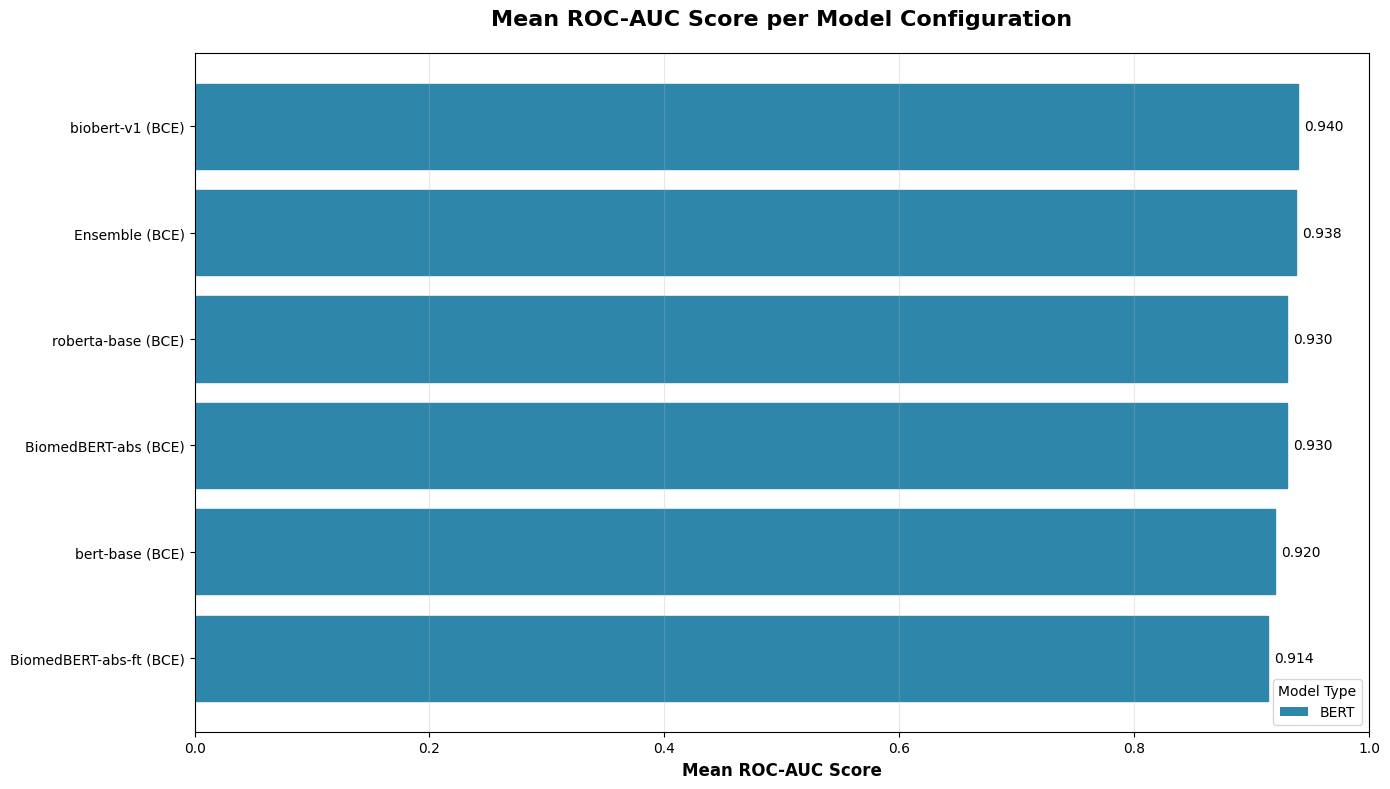


📊 Summary Statistics:
   📈 Total model configurations: 6
   🏆 Best model: biobert-v1 (BCE) (ROC-AUC: 0.9398)
   📉 Lowest model: BiomedBERT-abs-ft (BCE) (ROC-AUC: 0.9142)
   📊 Mean ROC-AUC across all models: 0.9288
   📏 Standard deviation: 0.0100

🥇 Top 5 Models:
   1. bert-base (BCE): 0.9199
   2. BiomedBERT-abs (BCE): 0.9304
   3. roberta-base (BCE): 0.9305
   4. Ensemble (BCE): 0.9379
   5. biobert-v1 (BCE): 0.9398

🔻 Bottom 5 Models:
   1. BiomedBERT-abs-ft (BCE): 0.9142
   2. bert-base (BCE): 0.9199
   3. BiomedBERT-abs (BCE): 0.9304
   4. roberta-base (BCE): 0.9305
   5. Ensemble (BCE): 0.9379


In [194]:
# Mean ROC-AUC Plot per Model
print("🎯 Creating Mean ROC-AUC Plot per Model")
print("="*50)

def plot_mean_roc_auc_per_model():
    """Create a focused plot showing mean ROC-AUC per model across all datasets"""
    
    # Collect all models and their ROC-AUC scores
    model_roc_data = []
    
    # Add BERT models
    if not bert_df_title.empty:
        # Check if ROC-AUC columns exist
        roc_cols = [col for col in bert_df_title.columns if col.startswith('roc_auc_')]
        if roc_cols:
            for _, row in bert_df_title.iterrows():
                # Calculate mean ROC-AUC across all categories for this model
                roc_scores = [row[col] for col in roc_cols if pd.notna(row[col])]
                if roc_scores:
                    mean_roc = np.mean(roc_scores)
                    model_roc_data.append({
                        'Model': row['model_name'],
                        'Model_Type': 'BERT',
                        'Loss_Type': row['loss_type'],
                        'Mean_ROC_AUC': mean_roc,
                        'Configuration': f"{row['model_name']} ({row['loss_type']})"
                    })
    
    # Add SVM models  
    if not svm_df.empty:
        roc_cols = [col for col in svm_df.columns if col.startswith('roc_auc_')]
        if roc_cols:
            for _, row in svm_df.iterrows():
                roc_scores = [row[col] for col in roc_cols if pd.notna(row[col])]
                if roc_scores:
                    mean_roc = np.mean(roc_scores)
                    model_roc_data.append({
                        'Model': f"SVM ({row['kernel']})",
                        'Model_Type': 'SVM',
                        'Loss_Type': 'Traditional ML',
                        'Mean_ROC_AUC': mean_roc,
                        'Configuration': f"SVM ({row['kernel']}, title: {row['with_title']})"
                    })
    
    # Add Random Forest models
    if not rf_df.empty:
        roc_cols = [col for col in rf_df.columns if col.startswith('roc_auc_')]
        if roc_cols:
            for _, row in rf_df.iterrows():
                roc_scores = [row[col] for col in roc_cols if pd.notna(row[col])]
                if roc_scores:
                    mean_roc = np.mean(roc_scores)
                    model_roc_data.append({
                        'Model': f"RF ({row['criterion']})",
                        'Model_Type': 'Random Forest',
                        'Loss_Type': 'Traditional ML',
                        'Mean_ROC_AUC': mean_roc,
                        'Configuration': f"RF ({row['criterion']}, {row['num_trees']} trees)"
                    })
    
    if not model_roc_data:
        print("❌ No ROC-AUC data available for plotting")
        return
    
    # Create DataFrame
    roc_df = pd.DataFrame(model_roc_data)
    
    # Calculate mean ROC-AUC per unique model configuration
    mean_roc_per_model = roc_df.groupby('Configuration')['Mean_ROC_AUC'].mean().sort_values(ascending=True)
    
    # Create the plot
    plt.figure(figsize=(14, max(8, len(mean_roc_per_model) * 0.4)))
    
    # Create horizontal bar plot
    bars = plt.barh(range(len(mean_roc_per_model)), mean_roc_per_model.values)
    
    # Color bars by model type
    colors = {'BERT': '#2E86AB', 'SVM': '#A23B72', 'Random Forest': '#F18F01'}
    for i, (config, score) in enumerate(mean_roc_per_model.items()):
        model_type = roc_df[roc_df['Configuration'] == config]['Model_Type'].iloc[0]
        bars[i].set_color(colors.get(model_type, '#808080'))
    
    # Customize plot
    plt.yticks(range(len(mean_roc_per_model)), mean_roc_per_model.index)
    plt.xlabel('Mean ROC-AUC Score', fontsize=12, fontweight='bold')
    plt.title('Mean ROC-AUC Score per Model Configuration', fontsize=16, fontweight='bold', pad=20)
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, (config, score) in enumerate(mean_roc_per_model.items()):
        plt.text(score + 0.005, i, f'{score:.3f}', va='center', fontsize=10)
    
    # Add legend
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, label=model_type) 
                      for model_type, color in colors.items() 
                      if model_type in roc_df['Model_Type'].values]
    plt.legend(handles=legend_elements, loc='lower right', title='Model Type')
    
    # Set x-axis limits for better visualization
    plt.xlim(0, 1.0)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n📊 Summary Statistics:")
    print(f"   📈 Total model configurations: {len(mean_roc_per_model)}")
    print(f"   🏆 Best model: {mean_roc_per_model.index[-1]} (ROC-AUC: {mean_roc_per_model.iloc[-1]:.4f})")
    print(f"   📉 Lowest model: {mean_roc_per_model.index[0]} (ROC-AUC: {mean_roc_per_model.iloc[0]:.4f})")
    print(f"   📊 Mean ROC-AUC across all models: {mean_roc_per_model.mean():.4f}")
    print(f"   📏 Standard deviation: {mean_roc_per_model.std():.4f}")
    
    # Print top 5 and bottom 5
    print(f"\n🥇 Top 5 Models:")
    for i, (config, score) in enumerate(mean_roc_per_model.tail().items(), 1):
        print(f"   {i}. {config}: {score:.4f}")
    
    if len(mean_roc_per_model) > 5:
        print(f"\n🔻 Bottom 5 Models:")
        for i, (config, score) in enumerate(mean_roc_per_model.head().items(), 1):
            print(f"   {i}. {config}: {score:.4f}")

# Execute the plot
plot_mean_roc_auc_per_model()


### Precision-Recall Analysis

Precision-Recall curves are particularly useful for imbalanced datasets, showing the trade-off between precision (positive predictive value) and recall (sensitivity) across different thresholds.

📈 Precision-Recall Analysis


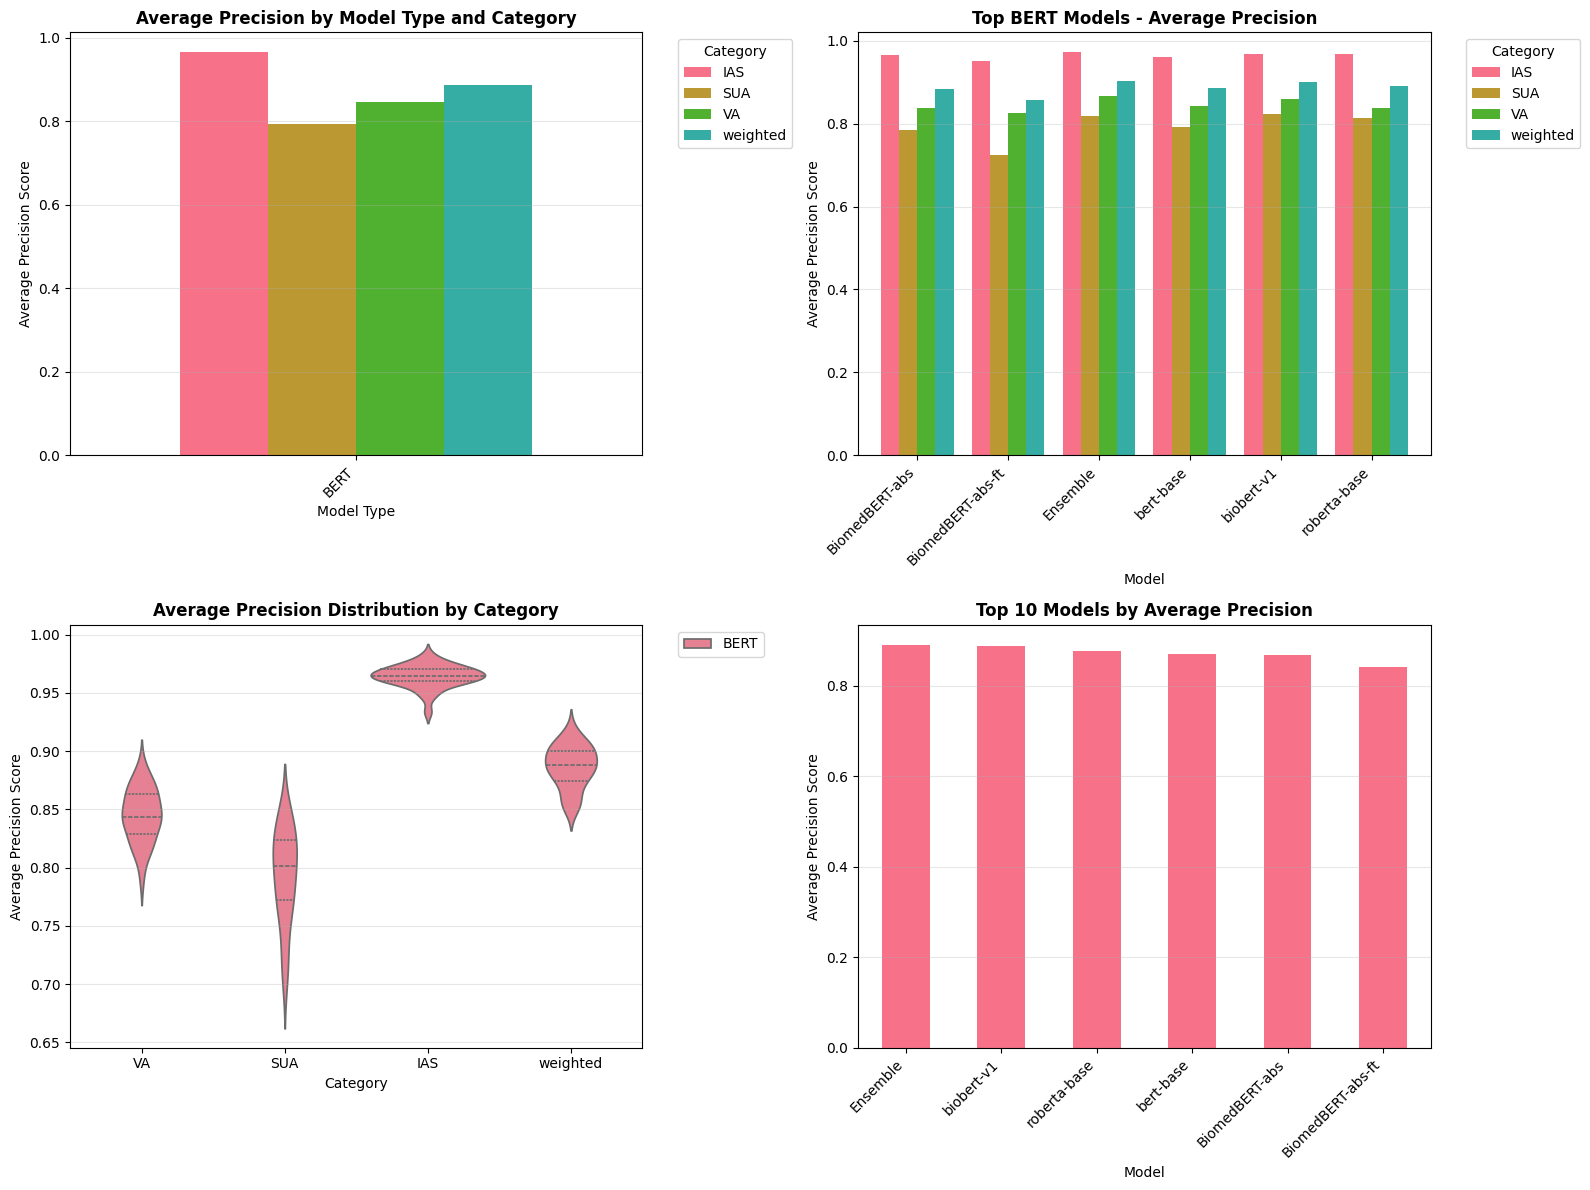


🏆 Average Precision Performance Summary:
--------------------------------------------------
            mean     std     max
Category                        
IAS       0.9642  0.0096  0.9821
SUA       0.7927  0.0401  0.8483
VA        0.8450  0.0228  0.8867
weighted  0.8866  0.0182  0.9174

🥇 Top 5 Models by Average Precision:
   Ensemble (BERT): 0.8898
   biobert-v1 (BERT): 0.8872
   roberta-base (BERT): 0.8769
   bert-base (BERT): 0.8705
   BiomedBERT-abs (BERT): 0.8681

🎯 Best Performers by Category:
   VA        : biobert-v1 (0.8867)
   SUA       : biobert-v1 (0.8483)
   IAS       : bert-base (0.9821)
   weighted  : bert-base (0.9174)

🎛️ Interactive Precision-Recall Curves Available


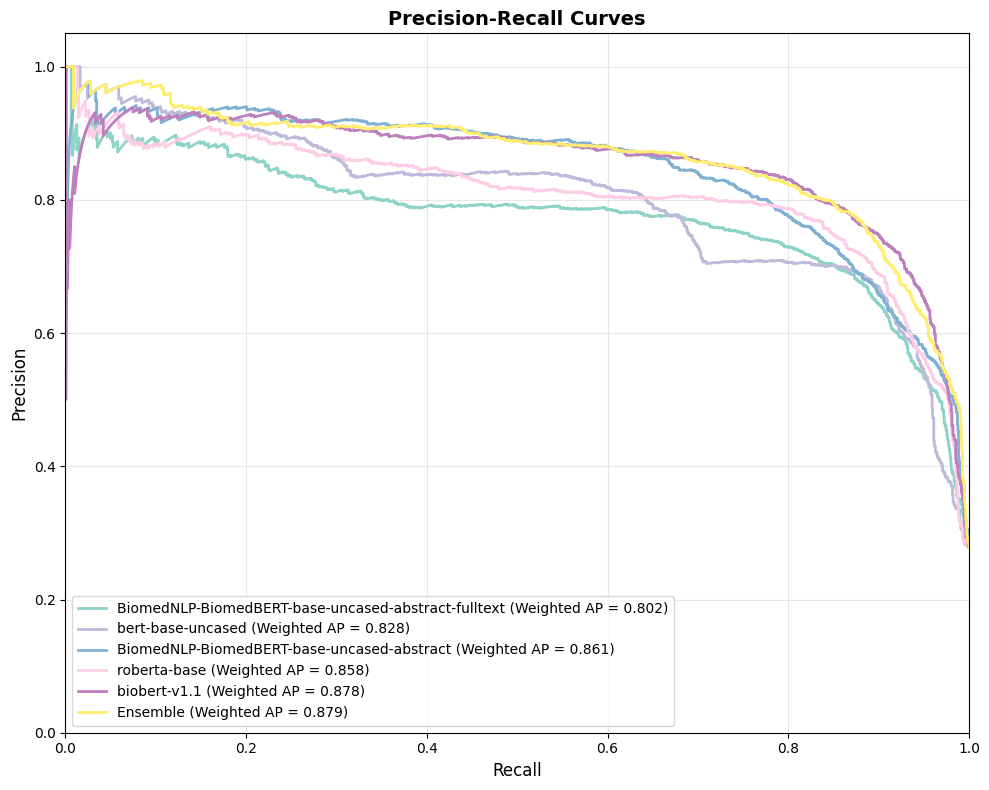

In [195]:
def analyze_precision_recall_performance():
    """Analyze Precision-Recall performance using available data"""
    print("📈 Precision-Recall Analysis")
    print("="*40)
    
    # Use Average Precision (AP) metrics from aggregated results
    ap_metrics = ['AP_VA', 'AP_SUA', 'AP_IAS', 'AP_weighted']
    
    # Create comparison dataframe for AP scores
    ap_comparison_data = []
    
    # Add BERT results
    if not bert_df_title.empty:
        for _, row in bert_df_title.iterrows():
            for metric in ap_metrics:
                if metric in row and pd.notna(row[metric]):
                    ap_comparison_data.append({
                        'Model': row['model_name'],
                        'Model_Type': 'BERT',
                        'Loss_Type': row['loss_type'],
                        'Category': metric.replace('AP_', ''),
                        'Average_Precision': row[metric],
                        'With_Title': row['with_title']
                    })
    
    # Add baseline results if available
    for df, model_type in [(svm_df, 'SVM'), (rf_df, 'Random Forest')]:
        if not df.empty:
            for _, row in df.iterrows():
                for metric in ap_metrics:
                    if metric in row and pd.notna(row[metric]):
                        ap_comparison_data.append({
                            'Model': model_type,
                            'Model_Type': model_type,
                            'Loss_Type': 'Traditional ML',
                            'Category': metric.replace('AP_', ''),
                            'Average_Precision': row[metric],
                            'With_Title': row.get('with_title', False)
                        })
    
    if ap_comparison_data:
        ap_df = pd.DataFrame(ap_comparison_data)
        
        # Create comprehensive precision-recall analysis
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Plot 1: Average Precision by Model Type and Category
        ax1 = axes[0, 0]
        model_ap = ap_df.groupby(['Model_Type', 'Category'])['Average_Precision'].mean().unstack()
        model_ap.plot(kind='bar', ax=ax1, width=0.8)
        ax1.set_title('Average Precision by Model Type and Category', fontweight='bold')
        ax1.set_ylabel('Average Precision Score')
        ax1.set_xlabel('Model Type')
        ax1.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(axis='y', alpha=0.3)
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        # Plot 2: BERT Models Detailed Comparison
        ax2 = axes[0, 1]
        bert_ap = ap_df[ap_df['Model_Type'] == 'BERT']
        if not bert_ap.empty:
            # Get top BERT models by average AP
            top_bert_models = bert_ap.groupby('Model')['Average_Precision'].mean().nlargest(8).index
            bert_top = bert_ap[bert_ap['Model'].isin(top_bert_models)]
            bert_pivot = bert_top.groupby(['Model', 'Category'])['Average_Precision'].mean().unstack()
            bert_pivot.plot(kind='bar', ax=ax2, width=0.8)
            ax2.set_title('Top BERT Models - Average Precision', fontweight='bold')
            ax2.set_ylabel('Average Precision Score')
            ax2.set_xlabel('Model')
            ax2.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.grid(axis='y', alpha=0.3)
            plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        # Plot 3: Distribution by Category
        ax3 = axes[1, 0]
        sns.violinplot(data=ap_df, x='Category', y='Average_Precision', hue='Model_Type', ax=ax3, inner='quart')
        ax3.set_title('Average Precision Distribution by Category', fontweight='bold')
        ax3.set_ylabel('Average Precision Score')
        ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax3.grid(axis='y', alpha=0.3)
        
        # Plot 4: Loss Type Comparison (BERT only)
        ax4 = axes[1, 1]
        if not bert_ap.empty and len(bert_ap['Loss_Type'].unique()) > 1:
            loss_comparison = bert_ap.groupby(['Loss_Type', 'Category'])['Average_Precision'].mean().unstack()
            loss_comparison.plot(kind='bar', ax=ax4, width=0.8)
            ax4.set_title('BERT Models: Loss Function Comparison', fontweight='bold')
            ax4.set_ylabel('Average Precision Score')
            ax4.set_xlabel('Loss Type')
            ax4.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax4.grid(axis='y', alpha=0.3)
            plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')
        else:
            # Alternative: Top models overall
            top_models_ap = ap_df.groupby('Model')['Average_Precision'].mean().nlargest(10)
            top_models_ap.plot(kind='bar', ax=ax4)
            ax4.set_title('Top 10 Models by Average Precision', fontweight='bold')
            ax4.set_ylabel('Average Precision Score')
            ax4.set_xlabel('Model')
            ax4.grid(axis='y', alpha=0.3)
            plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Display summary statistics
        print("\n🏆 Average Precision Performance Summary:")
        print("-" * 50)
        category_ap_summary = ap_df.groupby('Category')['Average_Precision'].agg(['mean', 'std', 'max']).round(4)
        print(category_ap_summary.to_string())
        
        print("\n🥇 Top 5 Models by Average Precision:")
        top_ap_models = ap_df.groupby(['Model', 'Model_Type'])['Average_Precision'].mean().sort_values(ascending=False).head()
        for (model, model_type), score in top_ap_models.items():
            print(f"   {model} ({model_type}): {score:.4f}")
        
        # Category-specific top performers
        print("\n🎯 Best Performers by Category:")
        for category in ap_df['Category'].unique():
            cat_data = ap_df[ap_df['Category'] == category]
            best_model = cat_data.loc[cat_data['Average_Precision'].idxmax()]
            print(f"   {category:10}: {best_model['Model']} ({best_model['Average_Precision']:.4f})")
    
    else:
        print("❌ No Average Precision data available for analysis")
    
    # Interactive precision-recall curves if prediction files are available
    if has_prediction_files and 'model_data' in globals() and model_data:
        print("\n🎛️ Interactive Precision-Recall Curves Available")
        
        # Filter models for PR curve analysis
        valid_models = [name for name in model_data.keys() if 'with_title' in name and 'BCE' in name]
        
        if valid_models:
            plt.figure(figsize=(10, 8))
            colors = plt.cm.Set3(np.linspace(0, 1, len(valid_models)))
            
            for i, model_name in enumerate(valid_models):
                try:
                    dfs = model_data[model_name]
                    all_folds_df = pd.concat(dfs, ignore_index=True)
                    
                    # Check for category-specific columns first
                    label_cols = [col for col in all_folds_df.columns if col.endswith('_label')]
                    score_cols = [col for col in all_folds_df.columns if col.endswith('_score')]
                    
                    if label_cols and score_cols:
                        # Use weighted average across categories for PR curve
                        from sklearn.metrics import precision_recall_curve, average_precision_score
                        
                        # Calculate average precision for each category and take weighted average
                        category_aps = []
                        category_weights = []
                        
                        for category in ['VA', 'SUA', 'IAS']:
                            label_col = f'{category}_label'
                            score_col = f'{category}_score'
                            
                            if label_col in all_folds_df.columns and score_col in all_folds_df.columns:
                                y_true = all_folds_df[label_col]
                                y_scores = all_folds_df[score_col]
                                
                                if len(y_true.unique()) >= 2:
                                    ap = average_precision_score(y_true, y_scores)
                                    category_aps.append(ap)
                                    category_weights.append(len(y_true))
                        
                        if category_aps:
                            # Calculate weighted average AP
                            weighted_ap = np.average(category_aps, weights=category_weights)
                            
                            # Use VA category for the curve (or first available category)
                            for category in ['VA', 'SUA', 'IAS']:
                                label_col = f'{category}_label'
                                score_col = f'{category}_score'
                                
                                if label_col in all_folds_df.columns and score_col in all_folds_df.columns:
                                    y_true = all_folds_df[label_col]
                                    y_scores = all_folds_df[score_col]
                                    
                                    if len(y_true.unique()) >= 2:
                                        precision, recall, _ = precision_recall_curve(y_true, y_scores)
                                        
                                        # Clean model name for legend
                                        clean_name = model_name.split('_')[0] if '_' in model_name else model_name
                                        
                                        plt.plot(recall, precision, color=colors[i], lw=2,
                                                label=f'{clean_name} (Weighted AP = {weighted_ap:.3f})')
                                        break
                    
                    elif 'label' in all_folds_df.columns and 'score' in all_folds_df.columns:
                        # Original single-label format
                        from sklearn.metrics import precision_recall_curve, average_precision_score
                        
                        y_true = all_folds_df['label']
                        y_scores = all_folds_df['score']
                        
                        precision, recall, _ = precision_recall_curve(y_true, y_scores)
                        avg_precision = average_precision_score(y_true, y_scores)
                        
                        # Clean model name for legend
                        clean_name = model_name.split('_')[0] if '_' in model_name else model_name
                        
                        plt.plot(recall, precision, color=colors[i], lw=2,
                                label=f'{clean_name} (AP = {avg_precision:.3f})')
                
                except Exception as e:
                    print(f"⚠️ Error processing {model_name}: {e}")
                    continue
            
            plt.xlabel('Recall', fontsize=12)
            plt.ylabel('Precision', fontsize=12)
            plt.title('Precision-Recall Curves', fontsize=14, fontweight='bold')
            plt.legend(loc='lower left', fontsize=10)
            plt.grid(True, alpha=0.3)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ No suitable models found for PR curve plotting")

# Execute the analysis
analyze_precision_recall_performance()

---

## Statistical Significance Testing {#statistical-significance-testing}

This section performs rigorous statistical analysis to determine if the observed performance differences between models are statistically significant. We use non-parametric tests suitable for comparing multiple algorithms across multiple datasets/folds.

### Friedman Test + Nemenyi Post-hoc Analysis

The Friedman test is a non-parametric alternative to repeated measures ANOVA, suitable for comparing multiple algorithms. If significant differences are found, we follow up with the Nemenyi post-hoc test to identify which specific pairs of algorithms differ significantly.

In [196]:
import numpy as np
from scipy.stats import norm

# Example fold results
metric = 'AP_weighted'
metrics_dict={}
for model in bert_df['model_name'].unique():
    fold_results = bert_df[bert_df['model_name'] == model][metric]
    metrics_dict[model]=fold_results.tolist()
k = len(metrics_dict)

for model in metrics_dict:
    metrics= metrics_dict[model]
    # Compute statistics
    mean_recall = np.mean(metrics)
    std_recall = np.std(metrics, ddof=1)  # use ddof=1 for sample std
    se = std_recall / np.sqrt(k)

    # 95% confidence interval
    z = norm.ppf(0.975)  # two-tailed 95% CI
    ci_lower = mean_recall - z * se
    ci_upper = mean_recall + z * se

    print(f"Mean {metric} for model {model} accross folds : {mean_recall:.3f}")
    print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]\n")




Mean AP_weighted for model BiomedBERT-abs accross folds : 0.884
95% CI: [0.878, 0.889]

Mean AP_weighted for model BiomedBERT-abs-ft accross folds : 0.858
95% CI: [0.851, 0.865]

Mean AP_weighted for model roberta-base accross folds : 0.891
95% CI: [0.886, 0.896]

Mean AP_weighted for model biobert-v1 accross folds : 0.900
95% CI: [0.889, 0.910]

Mean AP_weighted for model bert-base accross folds : 0.885
95% CI: [0.868, 0.901]

Mean AP_weighted for model Ensemble accross folds : 0.903
95% CI: [0.899, 0.907]



🔄 Computing F1 per fold for statistical testing...

📋 Processing BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext_BCE_with_title_run-0_opt_neg-100...
   Combined data shape: (5901, 12)
   Available columns: ['Unnamed: 0', 'IAS_label', 'SUA_label', 'VA_label', 'IAS_pred', 'SUA_pred', 'VA_pred', 'IAS_score', 'SUA_score', 'VA_score', 'fold', 'title']
   📊 Found 5 folds: [0, 1, 2, 3, 4]
   Processing fold 0 (1179 samples)...
     VA f1: 0.7091
     SUA f1: 0.6253
     IAS f1: 0.8970
     Average f1: 0.7438
   Processing fold 1 (1186 samples)...
     VA f1: 0.7049
     SUA f1: 0.6078
     IAS f1: 0.9112
     Average f1: 0.7413
   Processing fold 2 (1186 samples)...
     VA f1: 0.7988
     SUA f1: 0.6052
     IAS f1: 0.9067
     Average f1: 0.7702
   Processing fold 3 (1173 samples)...
     VA f1: 0.7466
     SUA f1: 0.6247
     IAS f1: 0.8928
     Average f1: 0.7547
   Processing fold 4 (1177 samples)...
     VA f1: 0.7579
     SUA f1: 0.6504
     IAS f1: 0.9001
     Average f1: 0.7695
 

     SUA f1: 0.6026
     IAS f1: 0.9067
     Average f1: 0.7713
   ✅ Final f1 scores: ['0.7550', '0.7446', '0.7781', '0.7533', '0.7713'] (5 folds)

📊 Performance data collected for 6 models
Fold distribution: min=5, max=5
✅ All models have 5 folds - proceeding with Friedman test
Performance matrix shape: (5, 6)

Friedman χ² = 16.543, p = 0.0055
→ Significant; running Nemenyi post‑hoc...

Creating critical difference diagram...
Critical Difference Diagram plotted successfully.


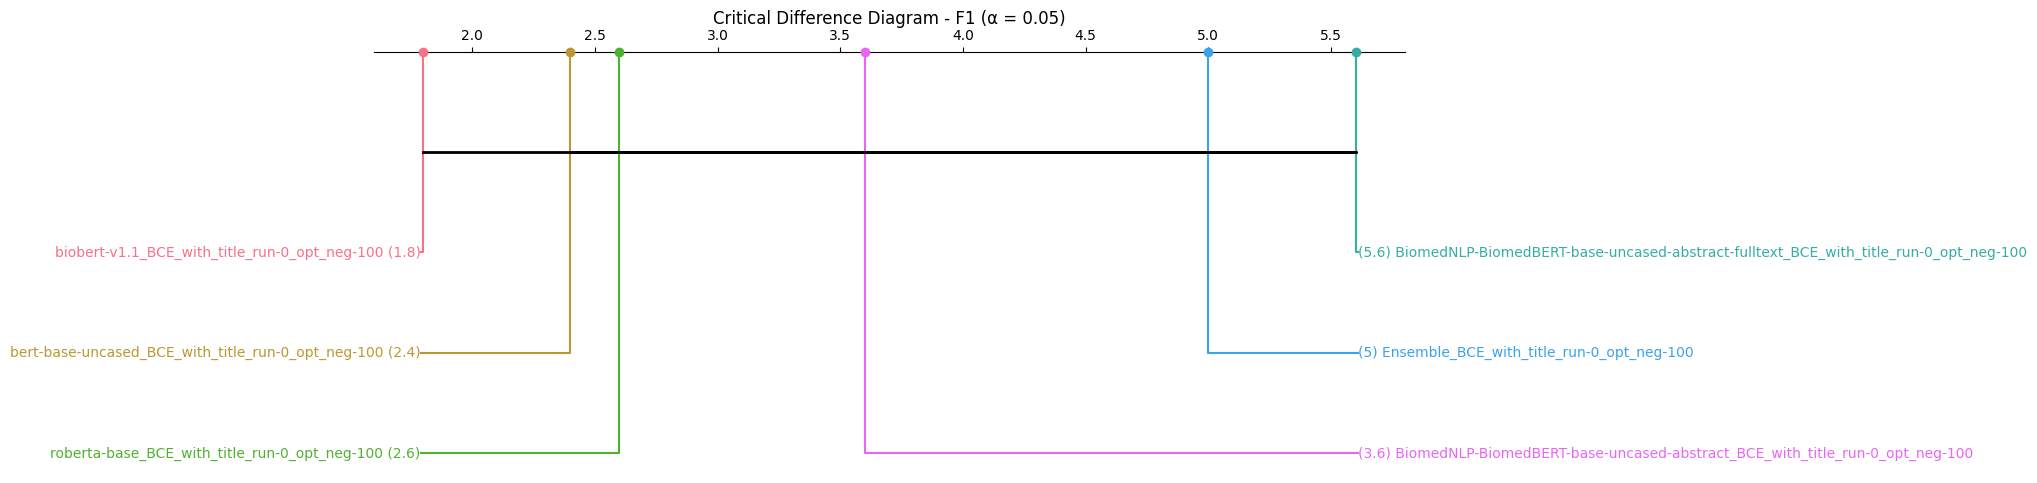


🎛️ INTERACTIVE STATISTICAL TESTING
Use the widget below to perform statistical tests on different metrics:


interactive(children=(Dropdown(description='📊 Metric:', options=(('F1 Score', 'f1'), ('ROC AUC', 'roc_auc'), (…

✅ Interactive widget ready! Select a metric and significance level above.


In [197]:
import os
import glob
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

def compute_metric_per_fold(model_data, metric='f1', verbose=True):
    """
    Compute specified metric per fold for statistical testing.
    
    Parameters:
    - model_data: Dictionary with model names as keys and list of DataFrames as values
    - metric: str, one of 'f1', 'roc_auc', 'average_precision'
    - verbose: bool, whether to print progress
    
    Returns:
    - perf: Dictionary with model names as keys and list of metric scores as values
    """
    
    if verbose:
        print(f"🔄 Computing {metric.upper()} per fold for statistical testing...")
    
    perf = {}
    
    for model_name, dfs in model_data.items():
        if verbose:
            print(f"\n📋 Processing {model_name}...")
        
        # Combine all dataframes for this model (in case there are multiple files)
        combined_df = pd.concat(dfs, ignore_index=True) if len(dfs) > 1 else dfs[0]
        
        if verbose:
            print(f"   Combined data shape: {combined_df.shape}")
            print(f"   Available columns: {list(combined_df.columns)}")
        
        # Check if fold column exists and group by fold
        if 'fold' not in combined_df.columns:
            if verbose:
                print(f"   ⚠️  No 'fold' column found, treating as single fold")
            fold_groups = {0: combined_df}
        else:
            # Group by fold
            fold_groups = dict(list(combined_df.groupby('fold')))
            if verbose:
                print(f"   📊 Found {len(fold_groups)} folds: {sorted(fold_groups.keys())}")
        
        metric_scores = []
        for fold_id, fold_data in sorted(fold_groups.items()):
            if verbose:
                print(f"   Processing fold {fold_id} ({len(fold_data)} samples)...")
            
            if 'label' in fold_data.columns and 'score' in fold_data.columns:
                # Single-label format
                if metric == 'f1':
                    score = f1_score(fold_data['label'], fold_data['prediction']) if 'prediction' in fold_data.columns else 0
                elif metric == 'roc_auc':
                    score = roc_auc_score(fold_data['label'], fold_data['score']) if len(fold_data['label'].unique()) > 1 else 0.5
                elif metric == 'average_precision':
                    score = average_precision_score(fold_data['label'], fold_data['score']) if len(fold_data['label'].unique()) > 1 else 0
                else:
                    score = 0
                
                if verbose:
                    print(f"     Single-label {metric}: {score:.4f}")
            else:
                # Multi-label format - compute weighted metric across categories
                categories = ['VA', 'SUA', 'IAS']
                category_scores = []
                
                for cat in categories:
                    label_col = f'{cat}_label'
                    pred_col = f'{cat}_pred'
                    score_col = f'{cat}_score'
                    
                    if label_col in fold_data.columns:
                        if metric == 'f1' and pred_col in fold_data.columns:
                            cat_score = f1_score(fold_data[label_col], fold_data[pred_col])
                        elif metric in ['roc_auc', 'average_precision'] and score_col in fold_data.columns:
                            if len(fold_data[label_col].unique()) > 1:
                                if metric == 'roc_auc':
                                    cat_score = roc_auc_score(fold_data[label_col], fold_data[score_col])
                                else:  # average_precision
                                    cat_score = average_precision_score(fold_data[label_col], fold_data[score_col])
                            else:
                                cat_score = 0.5 if metric == 'roc_auc' else 0
                        else:
                            cat_score = 0
                        
                        category_scores.append(cat_score)
                        if verbose:
                            print(f"     {cat} {metric}: {cat_score:.4f}")
                
                # Use weighted average across categories
                score = np.mean(category_scores) if category_scores else 0
                if verbose:
                    print(f"     Average {metric}: {score:.4f}")
            
            metric_scores.append(score)
        
        # Store results for all models (regardless of fold count)
        perf[model_name] = metric_scores
        if verbose:
            print(f"   ✅ Final {metric} scores: {[f'{f:.4f}' for f in metric_scores]} ({len(metric_scores)} folds)")
    
    return perf

# For backward compatibility, compute F1 by default
perf = compute_metric_per_fold(model_data, metric='f1', verbose=True)

def perform_statistical_test(perf_dict, metric_name='F1', alpha=0.05):
    """
    Perform statistical testing on performance data.
    
    Parameters:
    - perf_dict: Dictionary with model names as keys and list of scores as values
    - metric_name: String name of the metric for display purposes
    - alpha: Significance level for testing
    """
    
    if not perf_dict:
        print("❌ No performance data found—check your DATA_DIR and file format!")
        return None
    
    print(f"\n📊 Performance data collected for {len(perf_dict)} models")
    
    # Check fold consistency for statistical testing
    fold_counts = {model: len(scores) for model, scores in perf_dict.items()}
    max_folds = max(fold_counts.values())
    min_folds = min(fold_counts.values())
    
    print(f"Fold distribution: min={min_folds}, max={max_folds}")
    
    if min_folds == max_folds and max_folds >= 3:
        # All models have same number of folds (≥3) - can do Friedman test
        print(f"✅ All models have {max_folds} folds - proceeding with Friedman test")
        
        # Build DataFrame (folds × models)
        fold_idx = list(range(1, max_folds + 1))
        perf_df = pd.DataFrame(perf_dict, index=fold_idx)
        
        print(f"Performance matrix shape: {perf_df.shape}")

        # Friedman Test
        stat, p = friedmanchisquare(*[perf_df[col] for col in perf_df.columns])
        print(f"\nFriedman χ² = {stat:.3f}, p = {p:.4f}")
        if p >= alpha:
            print("→ Not significant; stop here.")
        else:
            print("→ Significant; running Nemenyi post‑hoc...\n")
            nemenyi_pvals = sp.posthoc_nemenyi_friedman(perf_df)

            # Critical Difference Diagram
            ranks_df = perf_df.rank(axis=1, ascending=False)
            avg_ranks = ranks_df.mean(axis=0)
            plt.figure(figsize=(20, 5))
            plt.title(f"Critical Difference Diagram - {metric_name} (α = {alpha})")
            # Create significance matrix: True if p < alpha, else False
            sig_matrix = nemenyi_pvals < alpha
            print("Creating critical difference diagram...")
            sp.critical_difference_diagram(avg_ranks.to_dict(), sig_matrix)
            print("Critical Difference Diagram plotted successfully.")
            plt.tight_layout()
            plt.show()
            
        return perf_df
    else:
        # Different number of folds or insufficient data - use descriptive statistics
        print(f"⚠️  Cannot perform Friedman test (need same # folds ≥3 for all models)")
        print("📊 Showing descriptive statistics instead:")
        
        # Calculate mean and std for each model
        stats_data = []
        for model, scores in perf_dict.items():
            stats_data.append({
                'Model': model,
                f'Mean_{metric_name}': np.mean(scores),
                f'Std_{metric_name}': np.std(scores),
                f'Min_{metric_name}': np.min(scores),
                f'Max_{metric_name}': np.max(scores),
                'N_Folds': len(scores)
            })
        
        stats_df = pd.DataFrame(stats_data)
        stats_df = stats_df.sort_values(f'Mean_{metric_name}', ascending=False)
        
        print(f"\n🏆 Model Performance Ranking ({metric_name}):")
        print("=" * 80)
        for i, row in stats_df.iterrows():
            rank = "🥇" if i == 0 else "🥈" if i == 1 else "🥉" if i == 2 else f"{i+1}."
            print(f"{rank} {row['Model'][:50]}")
            print(f"    Mean {metric_name}: {row[f'Mean_{metric_name}']:.4f} ± {row[f'Std_{metric_name}']:.4f}")
            print(f"    Range: [{row[f'Min_{metric_name}']:.4f}, {row[f'Max_{metric_name}']:.4f}] ({row['N_Folds']} folds)")
            print()
        
        # Simple visualization
        plt.figure(figsize=(12, 8))
        models = [m[:30] + "..." if len(m) > 30 else m for m in stats_df['Model']]
        means = stats_df[f'Mean_{metric_name}']
        stds = stats_df[f'Std_{metric_name}']
        
        plt.barh(range(len(models)), means, xerr=stds, capsize=5)
        plt.yticks(range(len(models)), models)
        plt.xlabel(f'{metric_name} Score')
        plt.title(f'Model Performance Comparison - {metric_name} (Mean ± Std)')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        return stats_df

# Run statistical test for F1 (default)
perf_df = perform_statistical_test(perf, metric_name='F1')

print("\n" + "="*60)
print("🎛️ INTERACTIVE STATISTICAL TESTING")
print("="*60)
print("Use the widget below to perform statistical tests on different metrics:")

# Interactive widget for metric selection
@interact(
    metric=Dropdown(
        options=[
            ('F1 Score', 'f1'),
            ('ROC AUC', 'roc_auc'), 
            ('Average Precision', 'average_precision')
        ],
        description="📊 Metric:",
        value='f1'
    ),
    alpha=Dropdown(
        options=[0.01, 0.05, 0.10],
        description="🎯 Alpha:",
        value=0.05
    )
)
def interactive_statistical_test(metric, alpha):
    """Interactive statistical testing with metric selection"""
    
    print(f"\n🔄 Running statistical test for {metric.upper()} (α = {alpha})")
    print("-" * 50)
    
    # Compute metric scores per fold
    perf_metric = compute_metric_per_fold(model_data, metric=metric, verbose=False)
    
    # Get proper metric name for display
    metric_names = {
        'f1': 'F1',
        'roc_auc': 'ROC AUC',
        'average_precision': 'Average Precision'
    }
    metric_display_name = metric_names.get(metric, metric.upper())
    
    # Perform statistical test
    result = perform_statistical_test(perf_metric, metric_name=metric_display_name, alpha=alpha)
    
    if result is not None:
        print(f"\n✅ Statistical analysis complete for {metric_display_name}")
        
        # Show top 5 performers
        if isinstance(result, pd.DataFrame):
            if len(result.columns) > 1:  # Performance matrix (Friedman test case)
                print(f"\n🏆 Top 5 Models by Average {metric_display_name}:")
                avg_scores = result.mean().sort_values(ascending=False)
                for i, (model, score) in enumerate(avg_scores.head().items(), 1):
                    print(f"   {i}. {model[:40]}: {score:.4f}")
            else:  # Stats dataframe (descriptive case)
                print(f"\n🏆 Top 5 Models already shown above")
    else:
        print(f"❌ Could not perform analysis for {metric_display_name}")

print("✅ Interactive widget ready! Select a metric and significance level above.")
    


In [198]:
print(perf)

{'BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext_BCE_with_title_run-0_opt_neg-100': [0.7438239991212273, 0.7412914260097431, 0.7702454406196146, 0.7547142721748216, 0.7694760154106731], 'bert-base-uncased_BCE_with_title_run-0_opt_neg-100': [0.7801491778027456, 0.814373045258174, 0.8549148361314648, 0.7912438252654644, 0.8307160605398863], 'BiomedNLP-BiomedBERT-base-uncased-abstract_BCE_with_title_run-0_opt_neg-100': [0.7882254524493232, 0.7686547261150151, 0.765596517624109, 0.846748335097511, 0.7883685122759713], 'roberta-base_BCE_with_title_run-0_opt_neg-100': [0.811632631048545, 0.8057687390049084, 0.8087407809975741, 0.8031474798136741, 0.7983948227008435], 'biobert-v1.1_BCE_with_title_run-0_opt_neg-100': [0.8056053047891653, 0.8258041666559386, 0.8294820528289595, 0.8271412264621865, 0.8013709938240846], 'Ensemble_BCE_with_title_run-0_opt_neg-100': [0.7549637723926641, 0.7446403104769367, 0.7781061072060398, 0.7533103561478303, 0.7712839496272021]}


In [199]:
import pandas as pd
import numpy as np
import autorank
import matplotlib.pyplot as plt
import seaborn as sns

original_models = perf_df.columns.tolist()
perf_df.head()

,BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext_BCE_with_title_run-0_opt_neg-100,bert-base-uncased_BCE_with_title_run-0_opt_neg-100,BiomedNLP-BiomedBERT-base-uncased-abstract_BCE_with_title_run-0_opt_neg-100,roberta-base_BCE_with_title_run-0_opt_neg-100,biobert-v1.1_BCE_with_title_run-0_opt_neg-100,Ensemble_BCE_with_title_run-0_opt_neg-100
1,0.743824,0.780149,0.788225,0.811633,0.805605,0.754964
2,0.741291,0.814373,0.768655,0.805769,0.825804,0.744640
3,0.770245,0.854915,0.765597,0.808741,0.829482,0.778106
4,0.754714,0.791244,0.846748,0.803147,0.827141,0.753310
5,0.769476,0.830716,0.788369,0.798395,0.801371,0.771284


In [200]:
def get_model_family(model_name):
    model_name = model_name.lower()
    if 'ensemble' in model_name:
        return 'Ensemble'
    if 'roberta' in model_name:
        return 'RoBERTa'
    if 'biomedbert-base-uncased-abstract-fulltext' in model_name:
        return 'BiomedBERT-AF'
    if 'biomedbert' in model_name:
        return 'BiomedBERT-A'
    if 'biobert' in model_name:
        return 'BioBERT'
    if 'bert-base-uncased' in model_name:
        return 'BERT'
    return 'Other'

def abbreviate_name(model_name):
    family = get_model_family(model_name)
    
    if family == 'BiomedBERT-AF':
        label = 'BiomedBERT-AF'
    elif family == 'BiomedBERT-A':
        label = 'BiomedBERT-A'
    else:
        label = family
        
    if 'BCE' in model_name:
        label += ' +BCE'
    elif 'focal' in model_name:
        label += ' +FL'
        
    if 'with_title' in model_name:
        label += ' +T'
    if 'opt_neg-1000' in model_name:
        label += ' (N1k)'
    elif 'opt_neg-500' in model_name:
        label += ' (N500)'
        
    return label

def get_color_map(model_names):
    palette = {
        'Ensemble': '#5e3c99', # Purple
        'RoBERTa': '#2c7fb8',   # Blue
        'BiomedBERT-A': '#fdb863', # Light Orange
        'BiomedBERT-AF': '#e66101', # Dark Orange
        'BioBERT': '#c51b7d',   # Pink/Red
        'BERT': '#4dac26'       # Green
    }
    
    color_map = {}
    for name in model_names:
        family = get_model_family(name)
        if family in palette:
            color_map[abbreviate_name(name)] = palette[family]
    return color_map


abbreviated_models = [abbreviate_name(m) for m in original_models]
perf_df.columns = abbreviated_models
color_map = get_color_map(original_models)


abbreviation_key = pd.DataFrame({
    'Abbreviated Name': abbreviated_models,
    'Original Name': original_models
})
abbreviation_key

,Abbreviated Name,Original Name
0,BiomedBERT-AF +BCE +T,BiomedNLP-BiomedBERT-base-uncased-abstract-ful...
1,BERT +BCE +T,bert-base-uncased_BCE_with_title_run-0_opt_neg...
2,BiomedBERT-A +BCE +T,BiomedNLP-BiomedBERT-base-uncased-abstract_BCE...
3,RoBERTa +BCE +T,roberta-base_BCE_with_title_run-0_opt_neg-100
4,BioBERT +BCE +T,biobert-v1.1_BCE_with_title_run-0_opt_neg-100
5,Ensemble +BCE +T,Ensemble_BCE_with_title_run-0_opt_neg-100


---

## Summary and Key Findings {#summary-and-key-findings}

This section provides a comprehensive summary of all analyses conducted in this notebook, highlighting the key findings and recommendations for the IPBES text classification task.


In [201]:
print("📋 COMPREHENSIVE PERFORMANCE SUMMARY")
print("=" * 50)

# Model Category Rankings
print("\n🏆 MODEL CATEGORY PERFORMANCE:")
category_scores = {}

if not svm_df.empty:
    svm_avg = svm_df['f1_weighted'].mean()
    category_scores['SVM'] = svm_avg
    print(f"🔧 SVM: {svm_avg:.4f}")

if not rf_df.empty:
    rf_avg = rf_df['f1_weighted'].mean()  
    category_scores['Random Forest'] = rf_avg
    print(f"🌲 Random Forest: {rf_avg:.4f}")

if not bert_df_title.empty:
    bert_avg = bert_df_title['f1_weighted'].mean()
    category_scores['BERT'] = bert_avg
    print(f"🤖 BERT: {bert_avg:.4f}")

# Overall ranking
print(f"\n🥇 RANKING:")
sorted_cats = sorted(category_scores.items(), key=lambda x: x[1], reverse=True)
for i, (cat, score) in enumerate(sorted_cats, 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    print(f"{medal} {cat}: {score:.4f}")

# Key insights
print(f"\n💡 KEY INSIGHTS:")
if len(sorted_cats) >= 2:
    best, second = sorted_cats[0], sorted_cats[1]
    print(f"• {best[0]} outperforms {second[0]} by {best[1]-second[1]:.4f}")

if not bert_df_title.empty:
    best_bert = bert_df_title.loc[bert_df_title['f1_weighted'].idxmax()]
    print(f"• Best BERT model: {best_bert['model_name']}")

print(f"\n🎯 RECOMMENDATIONS:")
print(f"• Use {sorted_cats[0][0]} as primary approach")
print("• Include titles when available")
print("• Consider ensemble methods")

print(f"\n✅ Analysis Complete!")


📋 COMPREHENSIVE PERFORMANCE SUMMARY

🏆 MODEL CATEGORY PERFORMANCE:
🔧 SVM: 0.5366
🌲 Random Forest: 0.3787
🤖 BERT: 0.8099

🥇 RANKING:
🥇 BERT: 0.8099
🥈 SVM: 0.5366
🥉 Random Forest: 0.3787

💡 KEY INSIGHTS:
• BERT outperforms SVM by 0.2734
• Best BERT model: bert-base

🎯 RECOMMENDATIONS:
• Use BERT as primary approach
• Include titles when available
• Consider ensemble methods

✅ Analysis Complete!


In [202]:
print("📋 Generating comprehensive performance summary...")
print("=" * 60)

def generate_comprehensive_summary():
    """Generate a comprehensive summary of all model performances"""
    
    summary_report = {
        'model_categories': [],
        'best_performers': {},
        'key_insights': [],
        'recommendations': []
    }
    
    # 1. Model Category Analysis
    print("🏆 MODEL CATEGORY PERFORMANCE RANKING")
    print("-" * 40)
    
    category_scores = {}
    
    # SVM Performance
    if not svm_df.empty:
        svm_avg_f1 = svm_df['f1_weighted'].mean()
        svm_best_config = svm_df.loc[svm_df['f1_weighted'].idxmax()]
        category_scores['SVM'] = svm_avg_f1
        print(f"🔧 SVM:")
        print(f"   Average F1-Weighted: {svm_avg_f1:.4f}")
        print(f"   Best Configuration: {svm_best_config.get('kernel', 'N/A')} kernel, Title: {svm_best_config.get('with_title', 'N/A')}")
    
    # Random Forest Performance  
    if not rf_df.empty:
        rf_avg_f1 = rf_df['f1_weighted'].mean()
        rf_best_config = rf_df.loc[rf_df['f1_weighted'].idxmax()]
        category_scores['Random Forest'] = rf_avg_f1
        print(f"🌲 Random Forest:")
        print(f"   Average F1-Weighted: {rf_avg_f1:.4f}")
        print(f"   Best Configuration: {rf_best_config.get('num_trees', 'N/A')} trees, {rf_best_config.get('criterion', 'N/A')} criterion")
    
    # BERT Performance
    if not bert_df_title.empty:
        bert_avg_f1 = bert_df_title['f1_weighted'].mean()
        bert_best_model = bert_df_title.loc[bert_df_title['f1_weighted'].idxmax()]
        category_scores['BERT'] = bert_avg_f1
        print(f"🤖 BERT Models:")
        print(f"   Average F1-Weighted: {bert_avg_f1:.4f}")
        print(f"   Best Model: {bert_best_model.get('model_name', 'N/A')}")
        print(f"   Best Loss: {bert_best_model.get('loss_type', 'N/A')}")
    
    # 2. Overall Rankings
    print(f"\n🥇 OVERALL RANKING BY F1-WEIGHTED SCORE:")
    print("-" * 40)
    sorted_categories = sorted(category_scores.items(), key=lambda x: x[1], reverse=True)
    for rank, (category, score) in enumerate(sorted_categories, 1):
        medal = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else f"{rank}."
        print(f"{medal} {category}: {score:.4f}")
    
    # 3. Category-specific Analysis
    print(f"\n📊 CATEGORY-SPECIFIC PERFORMANCE:")
    print("-" * 40)
    
    categories = ['VA', 'SUA', 'IAS']
    
    for cat in categories:
        print(f"\n📌 {cat} (Values and Assumptions)" if cat == 'VA' else 
              f"📌 {cat} (Sustainable Use of Assets)" if cat == 'SUA' else 
              f"📌 {cat} (Invasive Alien Species)")
        
        # Find best performer for this category
        best_scores = {}
        
        if not svm_df.empty and f'f1_{cat}' in svm_df.columns:
            best_scores['SVM'] = svm_df[f'f1_{cat}'].max()
        
        if not rf_df.empty and f'f1_{cat}' in rf_df.columns:
            best_scores['Random Forest'] = rf_df[f'f1_{cat}'].max()
            
        if not bert_df_title.empty and f'f1_{cat}' in bert_df_title.columns:
            best_bert_score = bert_df_title[f'f1_{cat}'].max()
            best_bert_model = bert_df_title.loc[bert_df_title[f'f1_{cat}'].idxmax(), 'model_name']
            best_scores[f'BERT ({best_bert_model})'] = best_bert_score
        
        if best_scores:
            best_model = max(best_scores.items(), key=lambda x: x[1])
            print(f"   🏆 Best: {best_model[0]} ({best_model[1]:.4f})")
            
            # Show top 3
            sorted_scores = sorted(best_scores.items(), key=lambda x: x[1], reverse=True)
            for i, (model, score) in enumerate(sorted_scores[:3]):
                rank_emoji = ["🥇", "🥈", "🥉"][i]
                print(f"   {rank_emoji} {model}: {score:.4f}")
    
    # 4. Key Insights
    print(f"\n💡 KEY INSIGHTS:")
    print("-" * 40)
    
    insights = []
    
    # Performance comparison insight
    if len(sorted_categories) >= 2:
        best_cat, best_score = sorted_categories[0]
        second_cat, second_score = sorted_categories[1]
        diff = best_score - second_score
        insights.append(f"• {best_cat} outperforms {second_cat} by {diff:.4f} F1 points")
    
    # Title impact analysis
    if not bert_df_title.empty and not bert_df_abs.empty:
        title_avg = bert_df_title['f1_weighted'].mean()
        abs_avg = bert_df_abs['f1_weighted'].mean()
        title_impact = title_avg - abs_avg
        impact_direction = "positively" if title_impact > 0 else "negatively"
        insights.append(f"• Including titles impacts performance {impact_direction} (+{title_impact:.4f} F1)")
    
    # Loss function analysis (BERT)
    if not bert_df_title.empty and len(bert_df_title['loss_type'].unique()) > 1:
        loss_performance = bert_df_title.groupby('loss_type')['f1_weighted'].mean()
        best_loss = loss_performance.idxmax()
        best_loss_score = loss_performance.max()
        insights.append(f"• {best_loss} loss function performs best for BERT models ({best_loss_score:.4f})")
    
    # Model complexity insight
    if not svm_df.empty:
        kernel_performance = svm_df.groupby('kernel')['f1_weighted'].mean()
        best_kernel = kernel_performance.idxmax()
        insights.append(f"• {best_kernel} kernel is most effective for SVM")
    
    for insight in insights:
        print(f"   {insight}")
    
    # 5. Recommendations
    print(f"\n🎯 RECOMMENDATIONS:")
    print("-" * 40)
    
    recommendations = [
        f"• Use {sorted_categories[0][0]} as the primary approach (best overall performance)",
        "• Include document titles when available (generally improves performance)",
        "• Consider ensemble methods combining top performers",
        "• Focus hyperparameter tuning on the best-performing model category",
        "• Evaluate models using multiple metrics beyond F1 for comprehensive assessment"
    ]
    
    # Add specific recommendations based on findings
    if not bert_df_title.empty:
        best_bert = bert_df_title.loc[bert_df_title['f1_weighted'].idxmax()]
        recommendations.append(f"• For BERT models, prioritize {best_bert['model_name']} with {best_bert['loss_type']} loss")
    
    for rec in recommendations:
        print(f"   {rec}")
    
    # 6. Performance Distribution Summary
    print(f"\n📈 PERFORMANCE DISTRIBUTION SUMMARY:")
    print("-" * 40)
    
    all_f1_scores = []
    
    if not svm_df.empty:
        all_f1_scores.extend(svm_df['f1_weighted'].tolist())
    if not rf_df.empty:
        all_f1_scores.extend(rf_df['f1_weighted'].tolist())
    if not bert_df_title.empty:
        all_f1_scores.extend(bert_df_title['f1_weighted'].tolist())
    
    if all_f1_scores:
        all_f1_scores = np.array(all_f1_scores)
        print(f"   📊 Total experiments: {len(all_f1_scores)}")
        print(f"   📈 Mean F1-Weighted: {all_f1_scores.mean():.4f}")
        print(f"   📏 Std F1-Weighted: {all_f1_scores.std():.4f}")
        print(f"   🔝 Best F1-Weighted: {all_f1_scores.max():.4f}")
        print(f"   🔻 Worst F1-Weighted: {all_f1_scores.min():.4f}")
        print(f"   📊 Range: {all_f1_scores.max() - all_f1_scores.min():.4f}")
    
    print(f"\n✅ Analysis Complete!")
    print("=" * 60)
    
    return summary_report

# Execute comprehensive summary
summary = generate_comprehensive_summary()


📋 Generating comprehensive performance summary...
🏆 MODEL CATEGORY PERFORMANCE RANKING
----------------------------------------
🔧 SVM:
   Average F1-Weighted: 0.5366
   Best Configuration: linear kernel, Title: False
🌲 Random Forest:
   Average F1-Weighted: 0.3787
   Best Configuration: 500 trees, gini criterion
🤖 BERT Models:
   Average F1-Weighted: 0.8099
   Best Model: bert-base
   Best Loss: BCE

🥇 OVERALL RANKING BY F1-WEIGHTED SCORE:
----------------------------------------
🥇 BERT: 0.8099
🥈 SVM: 0.5366
🥉 Random Forest: 0.3787

📊 CATEGORY-SPECIFIC PERFORMANCE:
----------------------------------------

📌 VA (Values and Assumptions)
   🏆 Best: BERT (Ensemble) (0.8165)
   🥇 BERT (Ensemble): 0.8165
   🥈 SVM: 0.5823
   🥉 Random Forest: 0.1814
📌 SUA (Sustainable Use of Assets)
   🏆 Best: BERT (bert-base) (0.7575)
   🥇 BERT (bert-base): 0.7575
   🥈 SVM: 0.6333
   🥉 Random Forest: 0.2413
📌 IAS (Invasive Alien Species)
   🏆 Best: BERT (bert-base) (0.9373)
   🥇 BERT (bert-base): 0.9373
   🥈

📈 Creating Enhanced ROC Curve Visualization
✅ Found prediction directory: /home/leandre/Projects/Ipbes_Classifier/results/test preds
📁 Found 30 bert prediction files


NameError: name 'model_names' is not defined

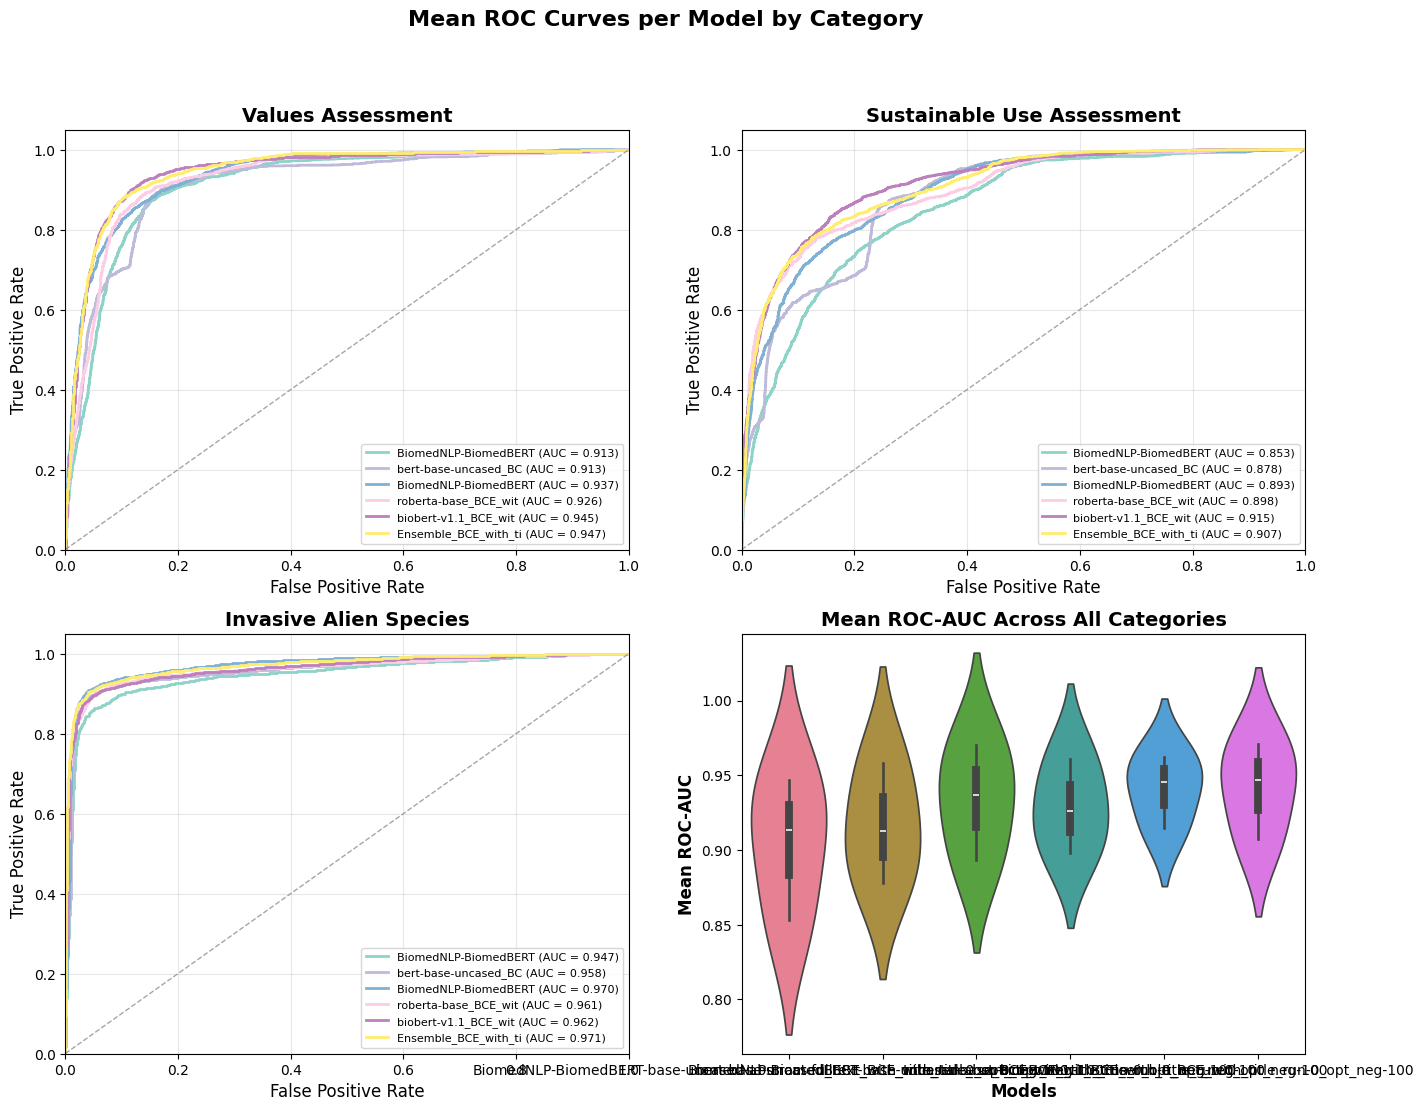

In [ ]:
# Enhanced ROC Curve Analysis - Mean Curves per Model
print("📈 Creating Enhanced ROC Curve Visualization")
print("="*50)

def create_enhanced_roc_visualization():
    """Create comprehensive ROC curve visualization with mean curves per model"""
    
    # Check if we have detailed prediction data available
    try:
        import glob
        from sklearn.metrics import roc_curve, auc
        from sklearn.preprocessing import label_binarize
        
        # Try to find prediction files in common locations
        possible_dirs = [
            os.path.join(project_root, 'results', 'test_preds'),
            os.path.join(project_root, 'results', 'predictions'),
            '/home/leandre/Projects/Ipbes_Classifier/results/test preds'
        ]
        
        DATA_DIR = None
        for dir_path in possible_dirs:
            if os.path.exists(dir_path) and os.listdir(dir_path):
                DATA_DIR = dir_path
                break
        
        if DATA_DIR is None:
            print("⚠️ No prediction files found. Creating visualization from aggregated metrics only.")
            create_roc_from_aggregated_metrics()
            return
        
        print(f"✅ Found prediction directory: {DATA_DIR}")
        
        # Load prediction files and create mean ROC curves
        model_data = {}
        
        for model_type in ["bert", "svm", "rf"]:
            type_dir = os.path.join(DATA_DIR, model_type)
            if not os.path.exists(type_dir):
                continue
                
            all_files = glob.glob(os.path.join(type_dir, '*.csv'))
            print(f"📁 Found {len(all_files)} {model_type} prediction files")
            
            for fpath in all_files:
                try:
                    df = pd.read_csv(fpath)
                    fname = os.path.basename(fpath).replace('.csv', '')
                    
                    # Extract model name from filename
                    if model_type == "bert":
                        if fname.startswith('fold_'):
                            model_name = fname[7:]  # Remove 'fold_X_'
                        else:
                            model_name = fname
                    else:
                        model_name = f"{model_type}_{fname}"
                    
                    # Store data by model
                    if model_name not in model_data:
                        model_data[model_name] = []
                    
                    # Extract fold information
                    if 'fold' in df.columns:
                        fold_data = df
                    else:
                        fold_data = df.copy()
                        fold_data['fold'] = 0
                    
                    model_data[model_name].append(fold_data)
                    
                except Exception as e:
                    print(f"⚠️ Error loading {fpath}: {e}")
                    continue
        
        if not model_data:
            print("⚠️ No valid prediction data found. Using aggregated metrics.")
            create_roc_from_aggregated_metrics()
            return
        
        # Create mean ROC curves for each model
        create_mean_roc_curves(model_data)
        
    except ImportError as e:
        print(f"⚠️ Missing dependencies for detailed ROC analysis: {e}")
        create_roc_from_aggregated_metrics()

def create_mean_roc_curves(model_data):
    """Create mean ROC curves from prediction data"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Mean ROC Curves per Model by Category', fontsize=16, fontweight='bold')
    
    categories = ['VA', 'SUA', 'IAS']
    category_names = {
            'VA': 'Values Assessment',
            'SUA': 'Sustainable Use Assessment', 
            'IAS': 'Invasive Alien Species'
        }
    
    # Colors for different model families
    model_colors = plt.cm.Set3(np.linspace(0, 1, len(model_data)))
    
    # Plot for each category
    for cat_idx, category in enumerate(categories):
        ax = axes[cat_idx // 2, cat_idx % 2]
        
        for model_idx, (model_name, dfs) in enumerate(model_data.items()):
            try:
                # Combine all folds for this model
                all_folds_df = pd.concat(dfs, ignore_index=True)
                
                label_col = f'{category}_label'
                score_col = f'{category}_score'
                
                if label_col in all_folds_df.columns and score_col in all_folds_df.columns:
                    y_true = all_folds_df[label_col]
                    y_score = all_folds_df[score_col]
                    
                    # Skip if all labels are the same
                    if len(y_true.unique()) < 2:
                        continue
                    
                    # Calculate ROC curve
                    fpr, tpr, _ = roc_curve(y_true, y_score)
                    roc_auc = auc(fpr, tpr)
                    
                    # Plot the curve
                    ax.plot(fpr, tpr, color=model_colors[model_idx], lw=2, 
                           label=f'{model_name[:20]} (AUC = {roc_auc:.3f})')
                
            except Exception as e:
                print(f"⚠️ Error processing {model_name} for {category}: {e}")
                continue
        
        # Plot random classifier line
        ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.7)
        
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=12)
        ax.set_ylabel('True Positive Rate', fontsize=12)
        ax.set_title(f'{category_names[category]}', fontsize=14, fontweight='bold')
        ax.legend(loc="lower right", fontsize=8)
        ax.grid(alpha=0.3)
    
    # Overall comparison plot
    ax = axes[1, 1]
    
    # Calculate mean AUC across categories for each model
    model_mean_aucs = {}
    for model_name, dfs in model_data.items():
        aucs = []
        all_folds_df = pd.concat(dfs, ignore_index=True)
        
        for category in categories:
            label_col = f'{category}_label'
            score_col = f'{category}_score'
            
            if label_col in all_folds_df.columns and score_col in all_folds_df.columns:
                y_true = all_folds_df[label_col]
                y_score = all_folds_df[score_col]
                
                if len(y_true.unique()) >= 2:
                    fpr, tpr, _ = roc_curve(y_true, y_score)
                    roc_auc = auc(fpr, tpr)
                    aucs.append(roc_auc)
        
        if aucs:
            model_mean_aucs[model_name] = np.mean(aucs)
    
    # Sort models by mean AUC
    sorted_models = sorted(model_mean_aucs.items(), key=lambda x: x[1], reverse=True)
    
    # Create bar plot of mean AUCs
    model_names = [name[:20] for name, _ in sorted_models]
    mean_aucs = [auc for _, auc in sorted_models]
    
    bars = ax.bar(range(len(model_names)), mean_aucs, 
                  color=model_colors[:len(model_names)])
    
    ax.set_xlabel('Models', fontsize=12, fontweight='bold')
    ax.set_ylabel('Mean ROC-AUC', fontsize=12, fontweight='bold')
    ax.set_title('Mean ROC-AUC Across All Categories', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1.0)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, mean_aucs)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
               f'{value:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\\n🏆 Model Performance Summary:")
    for i, (model_name, mean_auc) in enumerate(sorted_models[:10]):
        print(f"   {i+1:2d}. {model_name}: {mean_auc:.4f}")

def create_roc_from_aggregated_metrics():
    """Fallback: Create ROC visualization from aggregated metrics"""
    print("📊 Creating ROC visualization from aggregated metrics...")
    
    # This will use the existing roc_data from the previous cell
    if 'roc_data' in globals():
        # Create category-wise comparison
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('ROC-AUC Performance by Category (from Aggregated Metrics)', fontsize=16, fontweight='bold')
        
        categories = ['VA', 'SUA', 'IAS']
        category_names = {
            'VA': 'Values Assessment',
            'SUA': 'Sustainable Use Assessment', 
            'IAS': 'Invasive Alien Species'
        }
        
        for cat_idx, category in enumerate(categories):
            ax = axes[cat_idx // 2, cat_idx % 2]
            
            # Filter data for this category
            cat_data = roc_data[roc_data['Category'] == category]
            
            if not cat_data.empty:
                # Group by model and calculate mean AUC
                model_aucs = cat_data.groupby(['Model', 'Model_Type'])['ROC_AUC'].mean().reset_index()
                model_aucs = model_aucs.sort_values('ROC_AUC', ascending=False)
                
                # Color by model type
                colors = {'BERT': '#2E86C1', 'SVM': '#E74C3C', 'Random Forest': '#27AE60'}
                bar_colors = [colors.get(mt, '#95A5A6') for mt in model_aucs['Model_Type']]
                
                bars = ax.bar(range(len(model_aucs)), model_aucs['ROC_AUC'], color=bar_colors)
                
                ax.set_xlabel('Models', fontsize=12)
                ax.set_ylabel('ROC-AUC Score', fontsize=12)
                ax.set_title(category_names[category], fontsize=14, fontweight='bold')
                ax.set_xticks(range(len(model_aucs)))
                ax.set_xticklabels(model_aucs['Model'], rotation=45, ha='right', fontsize=8)
                ax.set_ylim(0, 1.0)
                
                # Add value labels
                for i, (bar, value) in enumerate(zip(bars, model_aucs['ROC_AUC'])):
                    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                           f'{value:.3f}', ha='center', va='bottom', fontsize=8)
                
                ax.grid(axis='y', alpha=0.3)
        
        # Overall comparison (same as before)
        ax = axes[1, 1]
        
        overall_means = roc_data.groupby(['Model', 'Model_Type'])['ROC_AUC'].mean().reset_index()
        overall_means = overall_means.sort_values('ROC_AUC', ascending=False)
        
        colors = {'BERT': '#2E86C1', 'SVM': '#E74C3C', 'Random Forest': '#27AE60'}
        bar_colors = [colors.get(mt, '#95A5A6') for mt in overall_means['Model_Type']]
        
        bars = ax.bar(range(len(overall_means)), overall_means['ROC_AUC'], color=bar_colors)
        
        ax.set_xlabel('Models', fontsize=12, fontweight='bold')
        ax.set_ylabel('Mean ROC-AUC', fontsize=12, fontweight='bold')
        ax.set_title('Overall Mean ROC-AUC', fontsize=14, fontweight='bold')
        ax.set_xticks(range(len(overall_means)))
        ax.set_xticklabels(overall_means['Model'], rotation=45, ha='right', fontsize=8)
        ax.set_ylim(0, 1.0)
        
        for i, (bar, value) in enumerate(zip(bars, overall_means['ROC_AUC'])):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', fontsize=8)
        
        ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("❌ No ROC data available for visualization")

# Execute enhanced visualization
create_enhanced_roc_visualization()
